In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

In [2]:
train_df = pd.read_csv('C:/Users/Olidia Lunga/Desktop/Data Science/Hotel/train.csv', nrows = 100000)
train_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [3]:
# Display the shape of the loaded datasets
print(f"Train shape: {train_df.shape}")

Train shape: (100000, 24)


In [4]:
train_df.describe(include=['O'])

,date_time,srch_ci,srch_co
count,100000,99929,99929
unique,99840,1029,1034
top,2014-04-10 13:57:24,2014-12-26,2015-01-02
freq,3,714,659


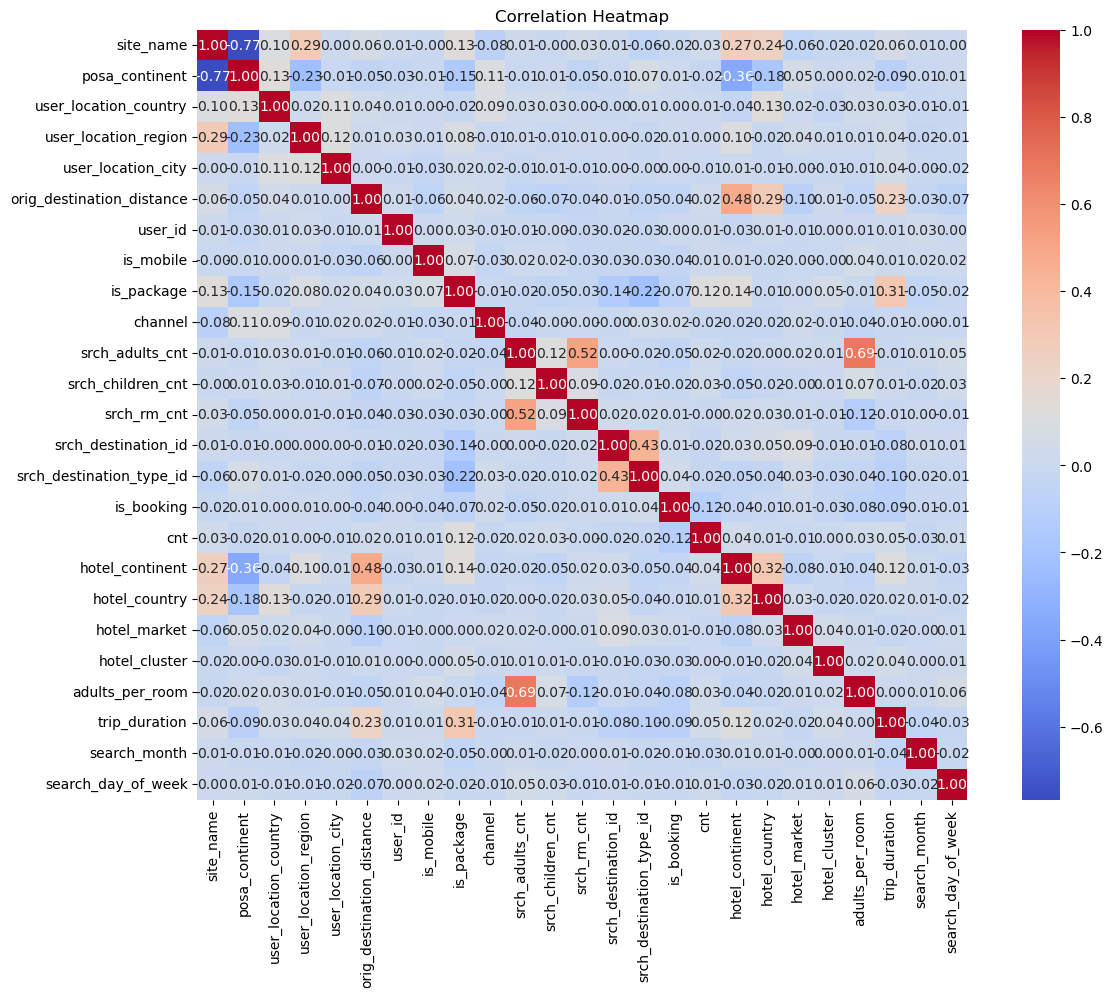

         Feature 1        Feature 2  Correlation
0   posa_continent        site_name    -0.767217
1        site_name   posa_continent    -0.767217
2      srch_rm_cnt  srch_adults_cnt     0.520605
3  adults_per_room  srch_adults_cnt     0.694272
4  srch_adults_cnt      srch_rm_cnt     0.520605
5  srch_adults_cnt  adults_per_room     0.694272
Strong correlations with hotel_cluster:
hotel_cluster    1.0
Name: hotel_cluster, dtype: float64


In [50]:
# Select only numeric columns
train_df_numeric = train_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = train_df_numeric.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Set a threshold for high correlation
threshold = 0.5

# Create a DataFrame to hold pairs of features with high correlations
high_correlations = []

# Loop through the correlation matrix
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if (correlation_matrix.loc[row, col] > threshold or correlation_matrix.loc[row, col] < -threshold) and row != col:
            high_correlations.append((row, col, correlation_matrix.loc[row, col]))

# Convert the list to a DataFrame for better readability
high_correlations_df = pd.DataFrame(high_correlations, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Display the high correlations
print(high_correlations_df)

# Identify strong correlations with hotel_cluster
if 'hotel_cluster' in train_df_numeric.columns:
    strong_correlations = correlation_matrix[abs(correlation_matrix['hotel_cluster']) > threshold]['hotel_cluster']
    print("Strong correlations with hotel_cluster:")
    print(strong_correlations)
else:
    print("hotel_cluster not found in the numeric DataFrame.")

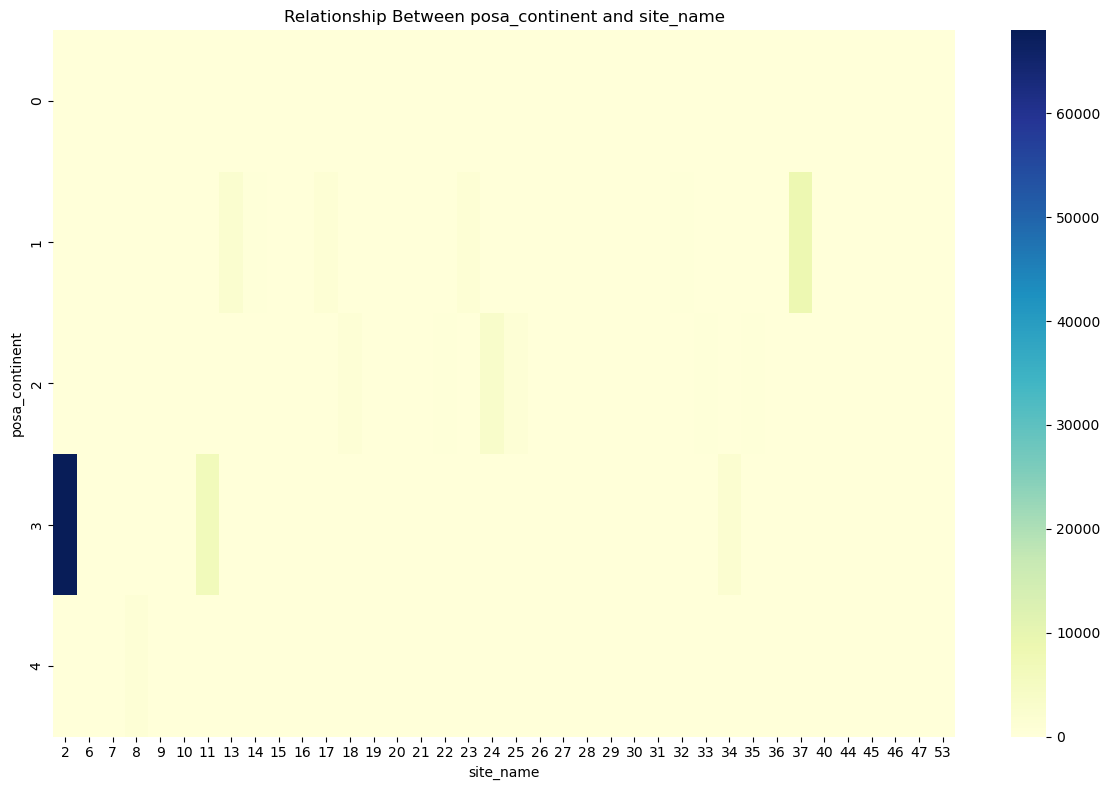

In [49]:
#Analyze the relationship between posa_continent and site_name
plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(train_df['posa_continent'], train_df['site_name'])
sns.heatmap(cross_tab, cmap='YlGnBu', annot=False)
plt.title('Relationship Between posa_continent and site_name')
plt.xlabel('site_name')
plt.ylabel('posa_continent')
plt.tight_layout()
plt.show()

In [9]:
# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a statistically significant relationship between posa_continent and site_name")
    print(f"We can reject the null hypothesis of independence with p-value = {p:.10f}")
else:
    print("There is not enough evidence to suggest a relationship between posa_continent and site_name")
    
# Calculate Cramer's V to measure the strength of association
n = cross_tab.sum().sum()
phi2 = chi2/n
r, k = cross_tab.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
r_corr = r - ((r-1)**2)/(n-1)
k_corr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))
print(f"Cramer's V: {cramers_v:.4f} (0 = no association, 1 = perfect association)")

Chi-square statistic: 400000.0
p-value: 0.0
Degrees of freedom: 148
There is a statistically significant relationship between posa_continent and site_name
We can reject the null hypothesis of independence with p-value = 0.0000000000
Cramer's V: 0.9998 (0 = no association, 1 = perfect association)


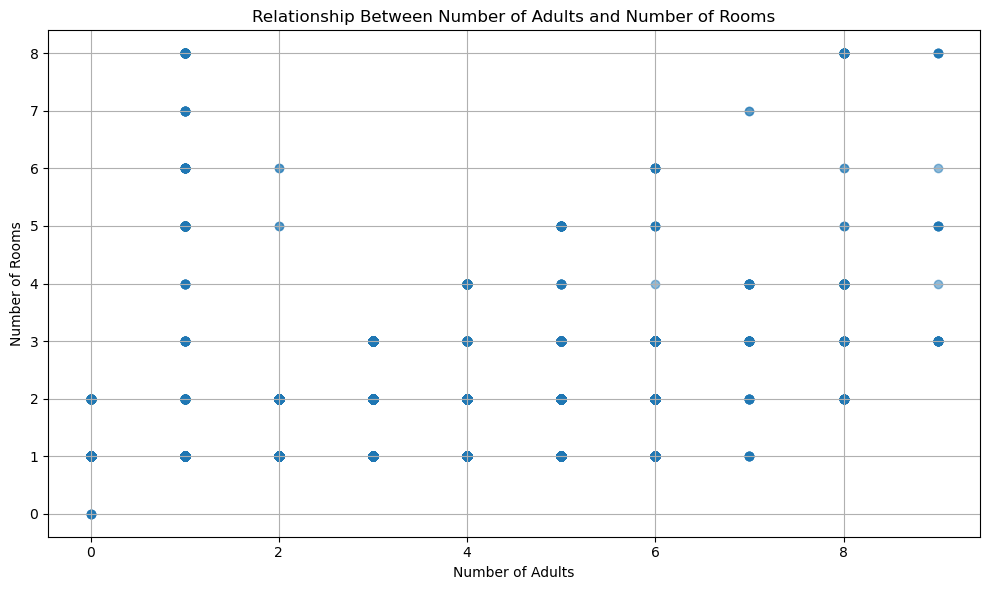

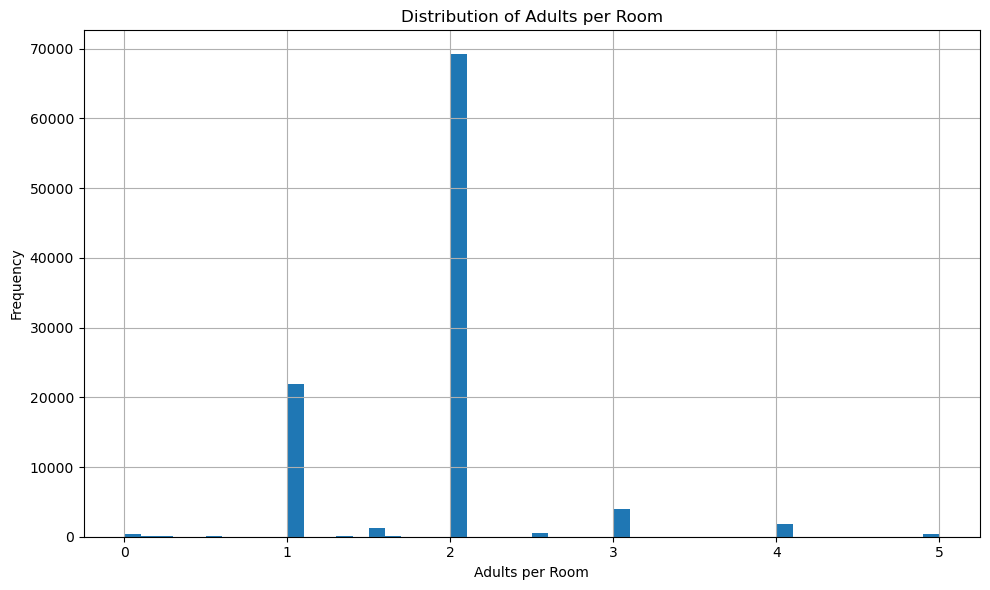

In [48]:
#Verify the correlation between srch_rm_cnt and srch_adults_cnt
plt.figure(figsize=(10, 6))
plt.scatter(train_df['srch_adults_cnt'], train_df['srch_rm_cnt'], alpha=0.5)
plt.title('Relationship Between Number of Adults and Number of Rooms')
plt.xlabel('Number of Adults')
plt.ylabel('Number of Rooms')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.close()  # Close the figure to free memory and prevent it from affecting future plots
# Calculate the average number of adults per room
train_df['adults_per_room'] = train_df['srch_adults_cnt'] / train_df['srch_rm_cnt']
plt.figure(figsize=(10, 6))
plt.hist(train_df['adults_per_room'].clip(0, 5), bins=50)
plt.title('Distribution of Adults per Room')
plt.xlabel('Adults per Room')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Pearson correlation (parametric test)
pearson_corr, pearson_p = pearsonr(train_df['srch_adults_cnt'], train_df['srch_rm_cnt'])
print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Pearson p-value: {pearson_p:.10f}")

# Spearman rank correlation (non-parametric test)
spearman_corr, spearman_p = spearmanr(train_df['srch_adults_cnt'], train_df['srch_rm_cnt'])
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p:.10f}")

# Interpret the results
alpha = 0.05
if pearson_p < alpha and spearman_p < alpha:
    print("There is a statistically significant correlation between number of adults and number of rooms")
    if pearson_corr > 0:
        print("The correlation is positive, suggesting that as the number of adults increases, the number of rooms tends to increase")
    else:
        print("The correlation is negative, suggesting that as the number of adults increases, the number of rooms tends to decrease")
else:
    print("There is not enough evidence to suggest a correlation between number of adults and number of rooms")

# Calculate coefficient of determination (R²)
r_squared = pearson_corr**2
print(f"R²: {r_squared:.4f} ({r_squared*100:.1f}% of the variance in one variable is explained by the other)")

Pearson correlation coefficient: 0.5206
Pearson p-value: 0.0000000000
Spearman correlation coefficient: 0.4415
Spearman p-value: 0.0000000000
There is a statistically significant correlation between number of adults and number of rooms
The correlation is positive, suggesting that as the number of adults increases, the number of rooms tends to increase
R²: 0.2710 (27.1% of the variance in one variable is explained by the other)


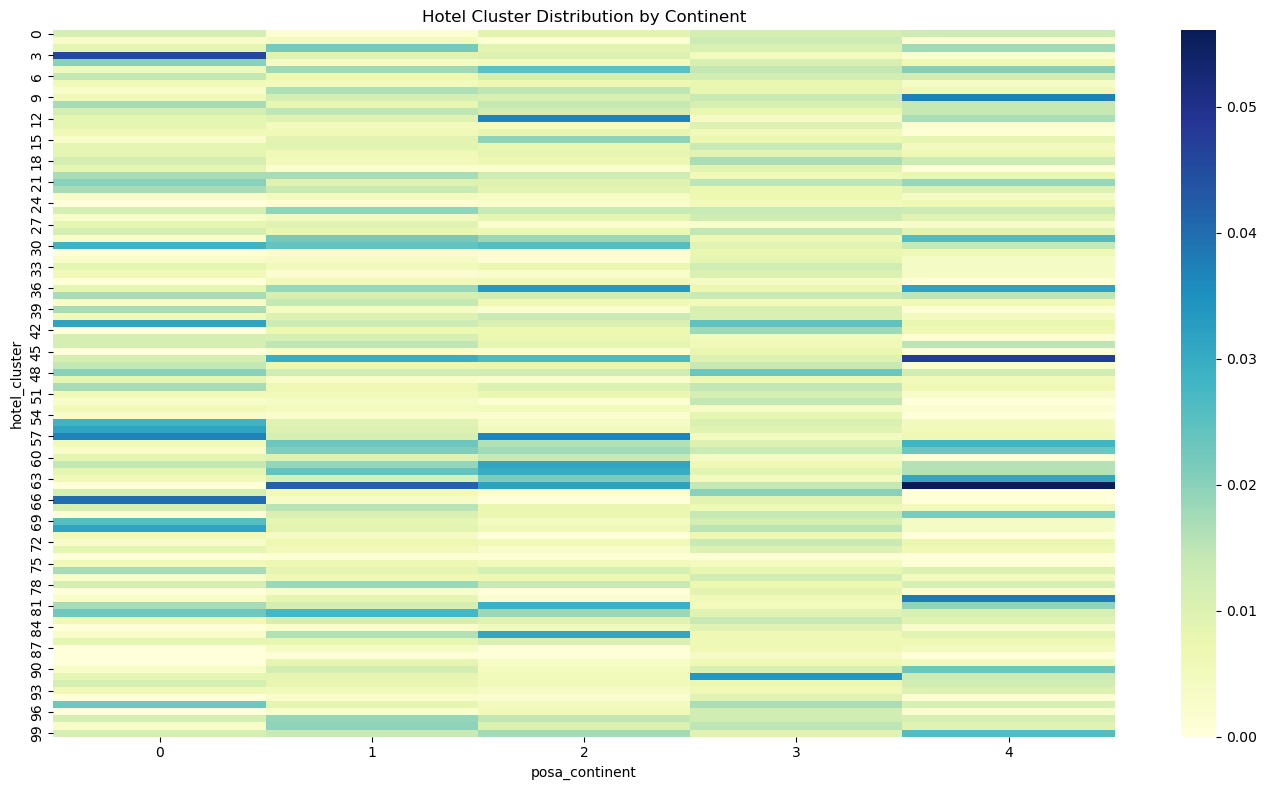

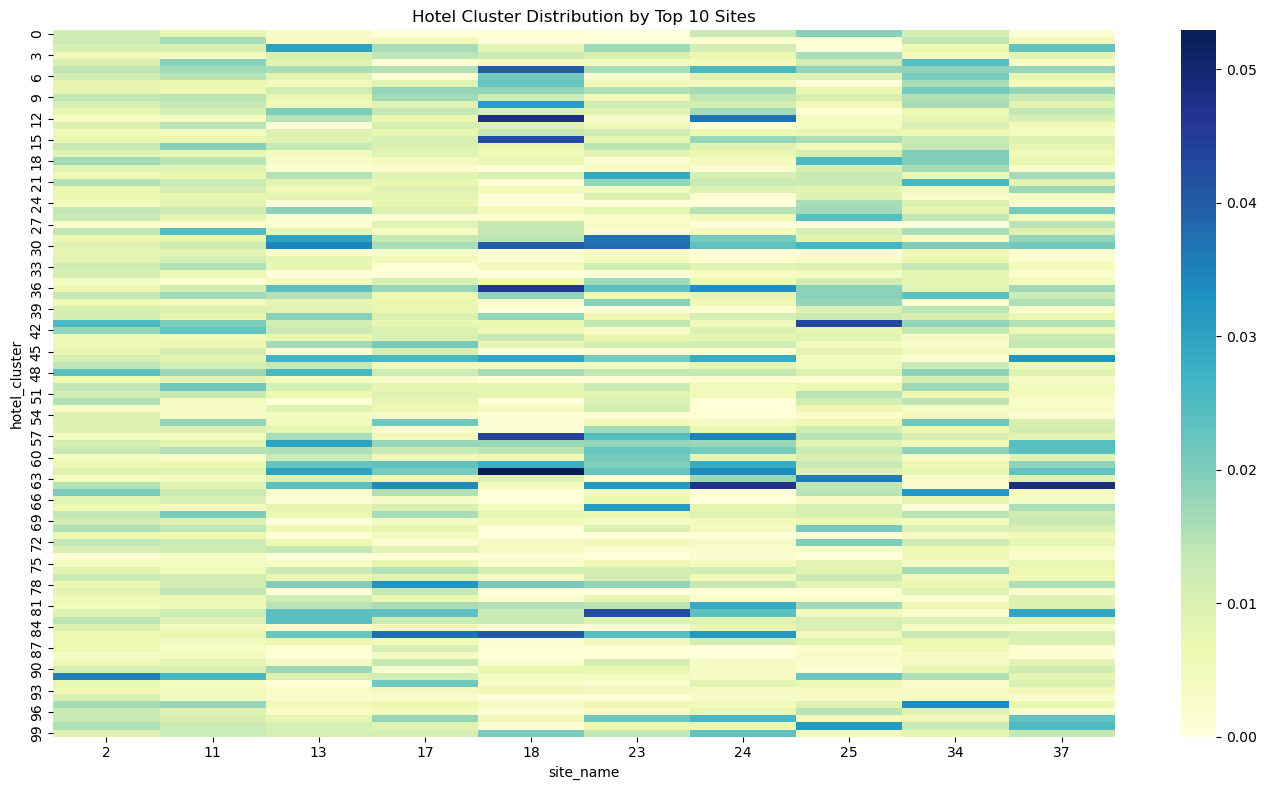

In [47]:
# 3. Examine how these correlated features relate to hotel_cluster
# First for posa_continent
plt.figure(figsize=(14, 8))
cluster_continent = pd.crosstab(train_df['hotel_cluster'], train_df['posa_continent'], normalize='columns')
sns.heatmap(cluster_continent, cmap='YlGnBu')
plt.title('Hotel Cluster Distribution by Continent')
plt.xlabel('posa_continent')
plt.ylabel('hotel_cluster')
plt.tight_layout()
# Save figure
fig.savefig('Images/continent_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

plt.close()  # Close the figure to free memory and prevent it from affecting future plots
# Then for site_name (top sites only for readability)
top_sites = train_df['site_name'].value_counts().head(10).index
site_subset = train_df[train_df['site_name'].isin(top_sites)]
plt.figure(figsize=(14, 8))
cluster_site = pd.crosstab(site_subset['hotel_cluster'], site_subset['site_name'], normalize='columns')
sns.heatmap(cluster_site, cmap='YlGnBu')
plt.title('Hotel Cluster Distribution by Top 10 Sites')
plt.xlabel('site_name')
plt.ylabel('hotel_cluster')
plt.tight_layout()
plt.show()

In [18]:
# Chi-square tests for independence between hotel_cluster and these features
for feature in ['posa_continent', 'site_name']:
    contingency = pd.crosstab(train_df['hotel_cluster'], train_df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-square test for hotel_cluster and {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"p-value: {p}")
    
    # Effect size with Cramer's V
    n = contingency.sum().sum()
    phi2 = chi2/n
    r, k = contingency.shape
    cramers_v = np.sqrt(phi2 / min(k-1, r-1))
    print(f"Cramer's V: {cramers_v:.4f}")
    
    # Hypothesis conclusion
    if p < 0.05:
        print(f"We reject the null hypothesis. There is a significant association between hotel_cluster and {feature}.")
    else:
        print(f"We fail to reject the null hypothesis. There is no significant association between hotel_cluster and {feature}.")

# Cramer's V
    print(f"Cramer's V: {cramers_v:.4f}")
    
    # Effect size interpretation
    if cramers_v < 0.1:
        effect_size = "small effect"
    elif cramers_v < 0.3:
        effect_size = "medium effect"
    else:
        effect_size = "large effect"

    print(f"The strength of the association is a {effect_size} (Cramer's V).")


Chi-square test for hotel_cluster and posa_continent:
Chi-square statistic: 14543.039791386873
p-value: 0.0
Cramer's V: 0.1907
We reject the null hypothesis. There is a significant association between hotel_cluster and posa_continent.
Cramer's V: 0.1907
The strength of the association is a medium effect (Cramer's V).

Chi-square test for hotel_cluster and site_name:
Chi-square statistic: 28417.375394715687
p-value: 0.0
Cramer's V: 0.0876
We reject the null hypothesis. There is a significant association between hotel_cluster and site_name.
Cramer's V: 0.0876
The strength of the association is a small effect (Cramer's V).


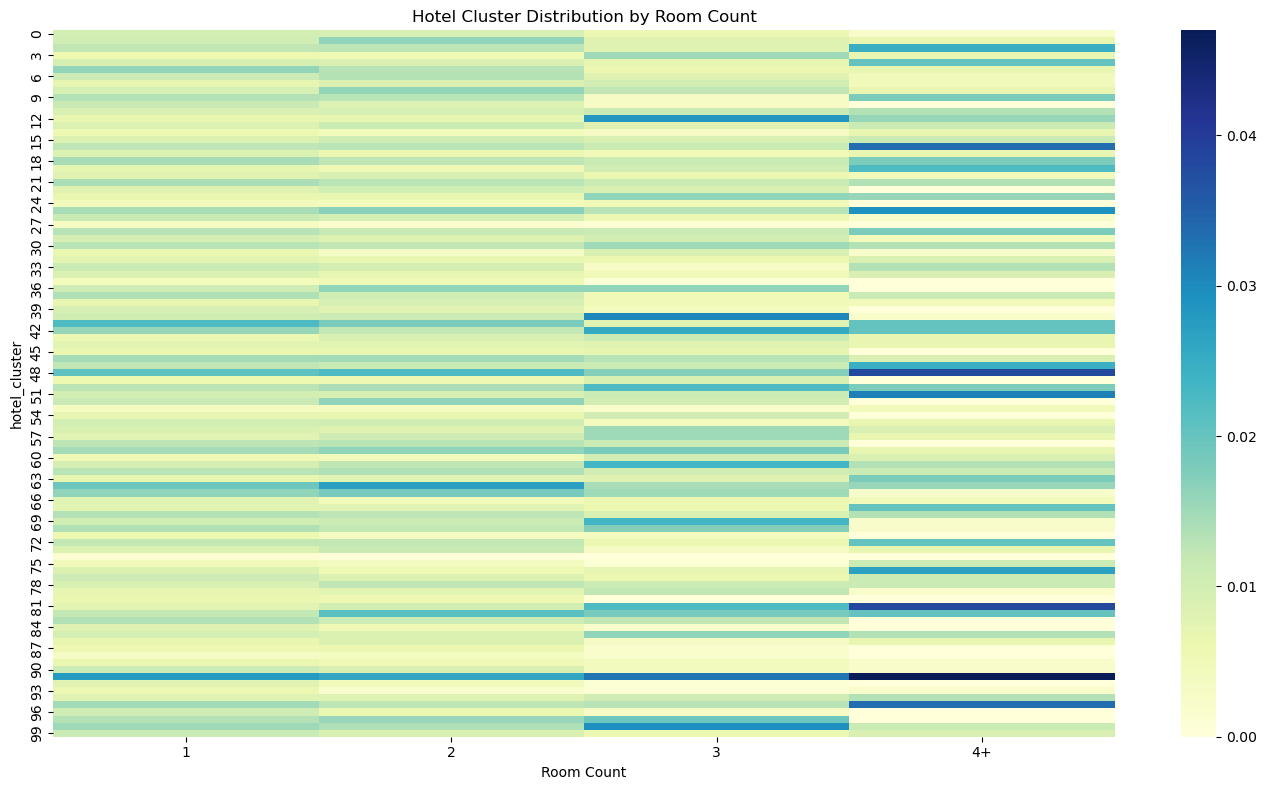

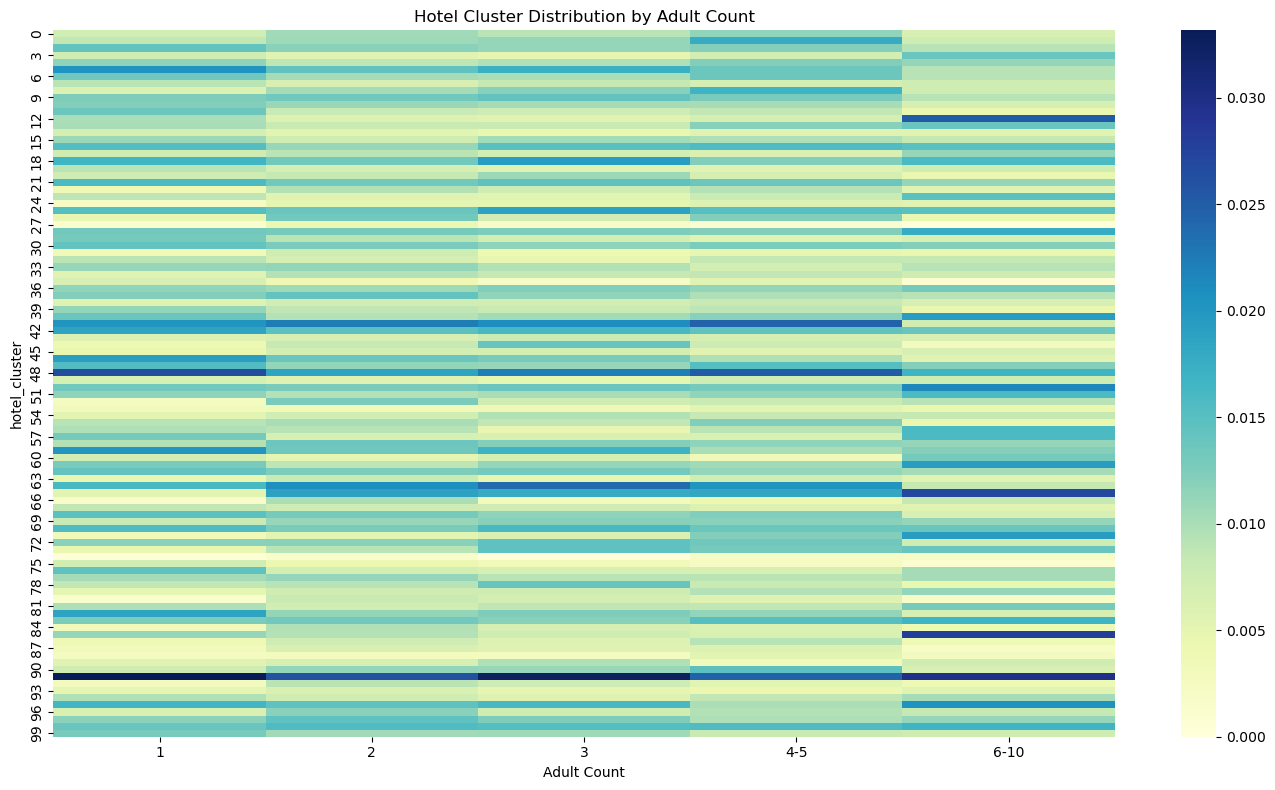

In [19]:
# 4. Analyze how srch_rm_cnt and srch_adults_cnt relate to hotel_cluster

# Create room and adult categories for easier visualization
train_df['room_category'] = pd.cut(train_df['srch_rm_cnt'], bins=[0, 1, 2, 3, 10], labels=['1', '2', '3', '4+'])
train_df['adult_category'] = pd.cut(train_df['srch_adults_cnt'], bins=[0, 1, 2, 3, 5, 10, 100], 
                                    labels=['1', '2', '3', '4-5', '6-10', '10+'])

# Room count vs hotel cluster
plt.figure(figsize=(14, 8))
room_cluster = pd.crosstab(train_df['hotel_cluster'], train_df['room_category'], normalize='columns')
sns.heatmap(room_cluster, cmap='YlGnBu')
plt.title('Hotel Cluster Distribution by Room Count')
plt.xlabel('Room Count')
plt.ylabel('hotel_cluster')
plt.tight_layout()
plt.show()

# Adult count vs hotel cluster
plt.figure(figsize=(14, 8))
adult_cluster = pd.crosstab(train_df['hotel_cluster'], train_df['adult_category'], normalize='columns')
sns.heatmap(adult_cluster, cmap='YlGnBu')
plt.title('Hotel Cluster Distribution by Adult Count')
plt.xlabel('Adult Count')
plt.ylabel('hotel_cluster')
plt.tight_layout()
plt.show()

In [21]:
# ANOVA test to see if hotel clusters differ in their mean room counts
from scipy.stats import f_oneway

# Group by hotel cluster and get room counts for each
room_groups = [train_df.loc[train_df['hotel_cluster'] == cluster, 'srch_rm_cnt'] 
               for cluster in train_df['hotel_cluster'].unique()]

# Run ANOVA
f_stat, p_value = f_oneway(*room_groups)
print("\nANOVA test for room counts across hotel clusters:")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Hypothesis conclusion for room counts
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in mean room counts across hotel clusters.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in mean room counts across hotel clusters.")

# Repeat for adult counts
adult_groups = [train_df.loc[train_df['hotel_cluster'] == cluster, 'srch_adults_cnt'] 
                for cluster in train_df['hotel_cluster'].unique()]
f_stat, p_value = f_oneway(*adult_groups)
print("\nANOVA test for adult counts across hotel clusters:")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Hypothesis conclusion for adult counts
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in mean adult counts across hotel clusters.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in mean adult counts across hotel clusters.")


ANOVA test for room counts across hotel clusters:
F-statistic: 4.73822558486241
p-value: 2.5563147049524492e-49
We reject the null hypothesis. There is a significant difference in mean room counts across hotel clusters.

ANOVA test for adult counts across hotel clusters:
F-statistic: 8.716828374355847
p-value: 1.4216530656510272e-121
We reject the null hypothesis. There is a significant difference in mean adult counts across hotel clusters.


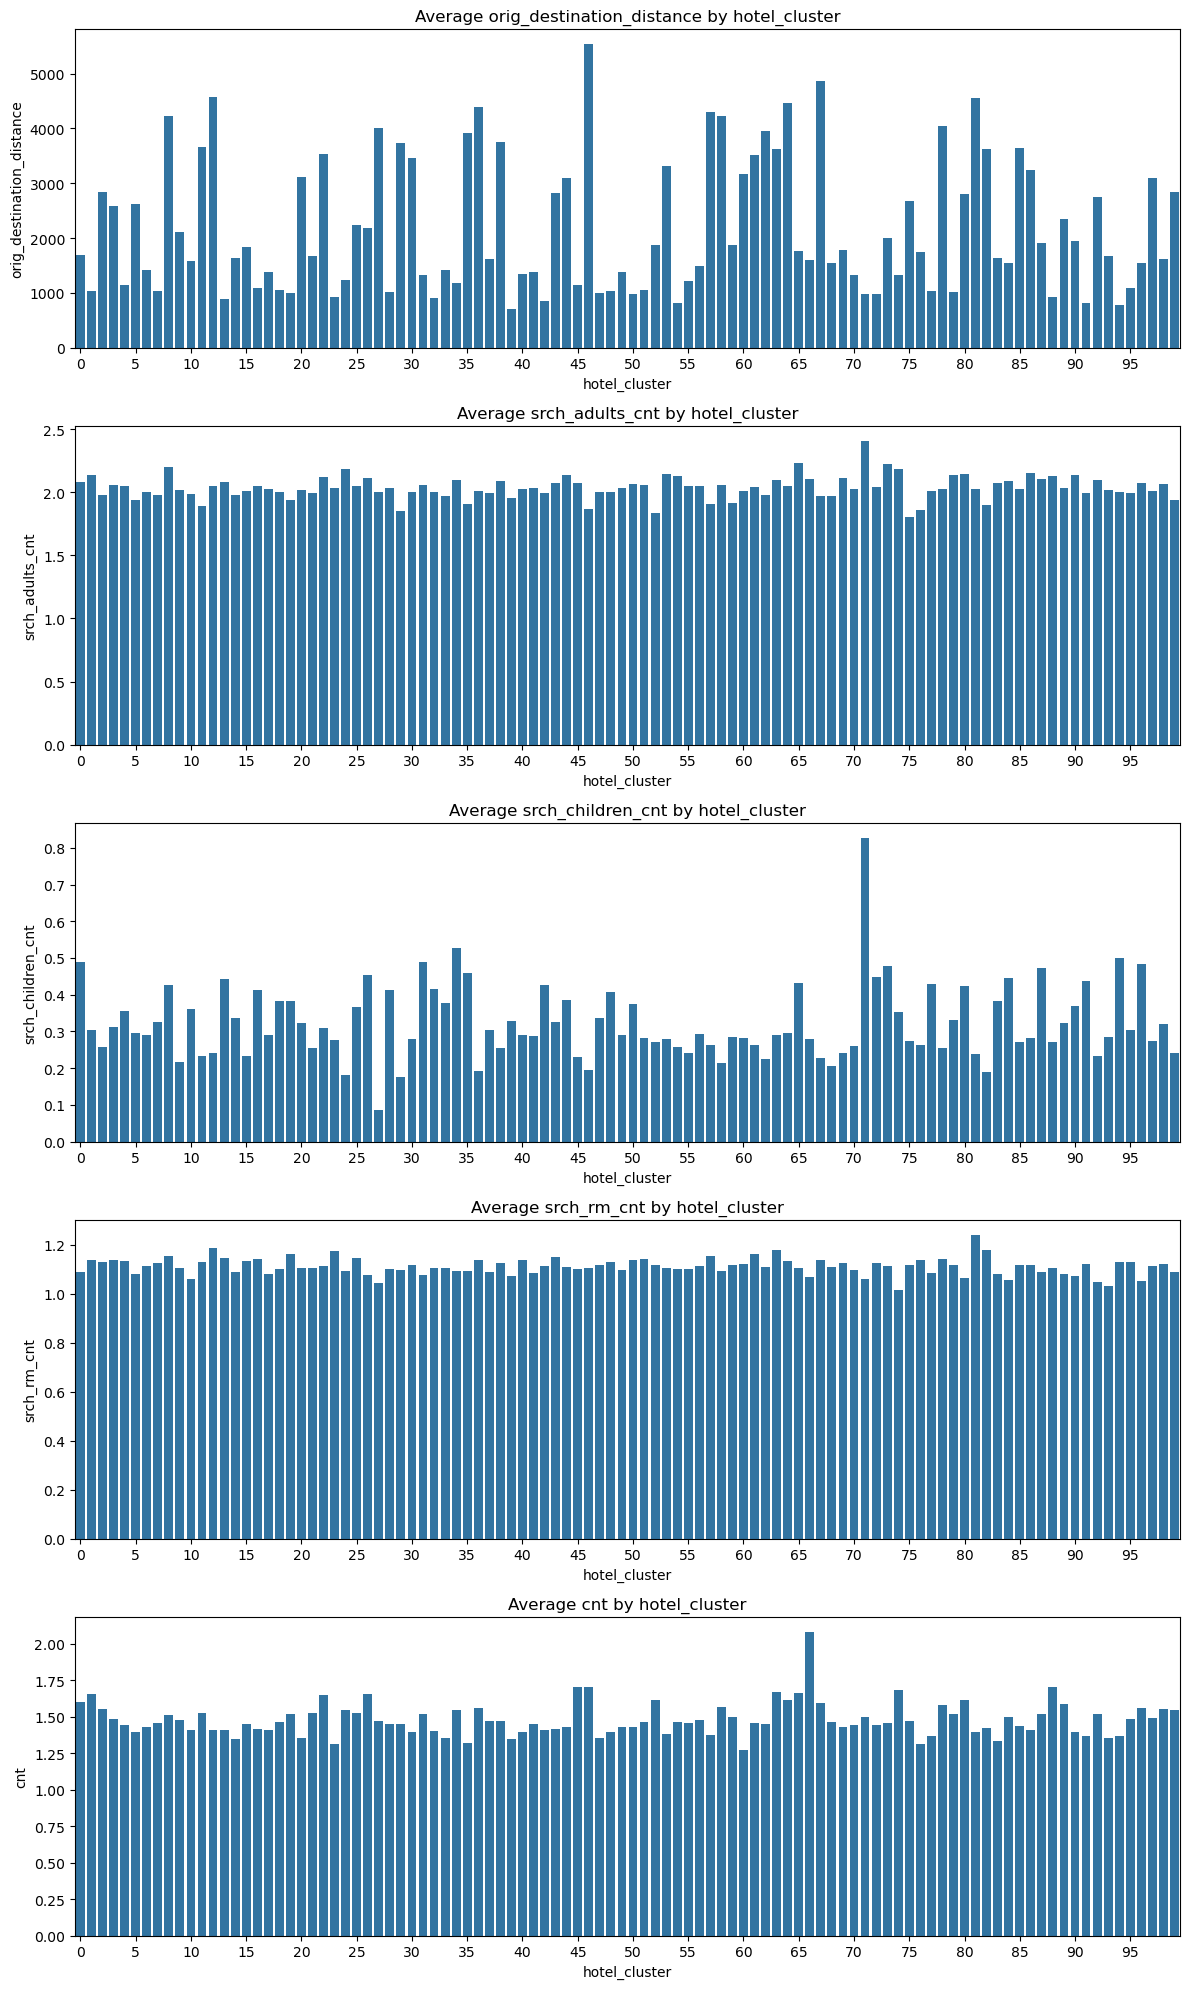

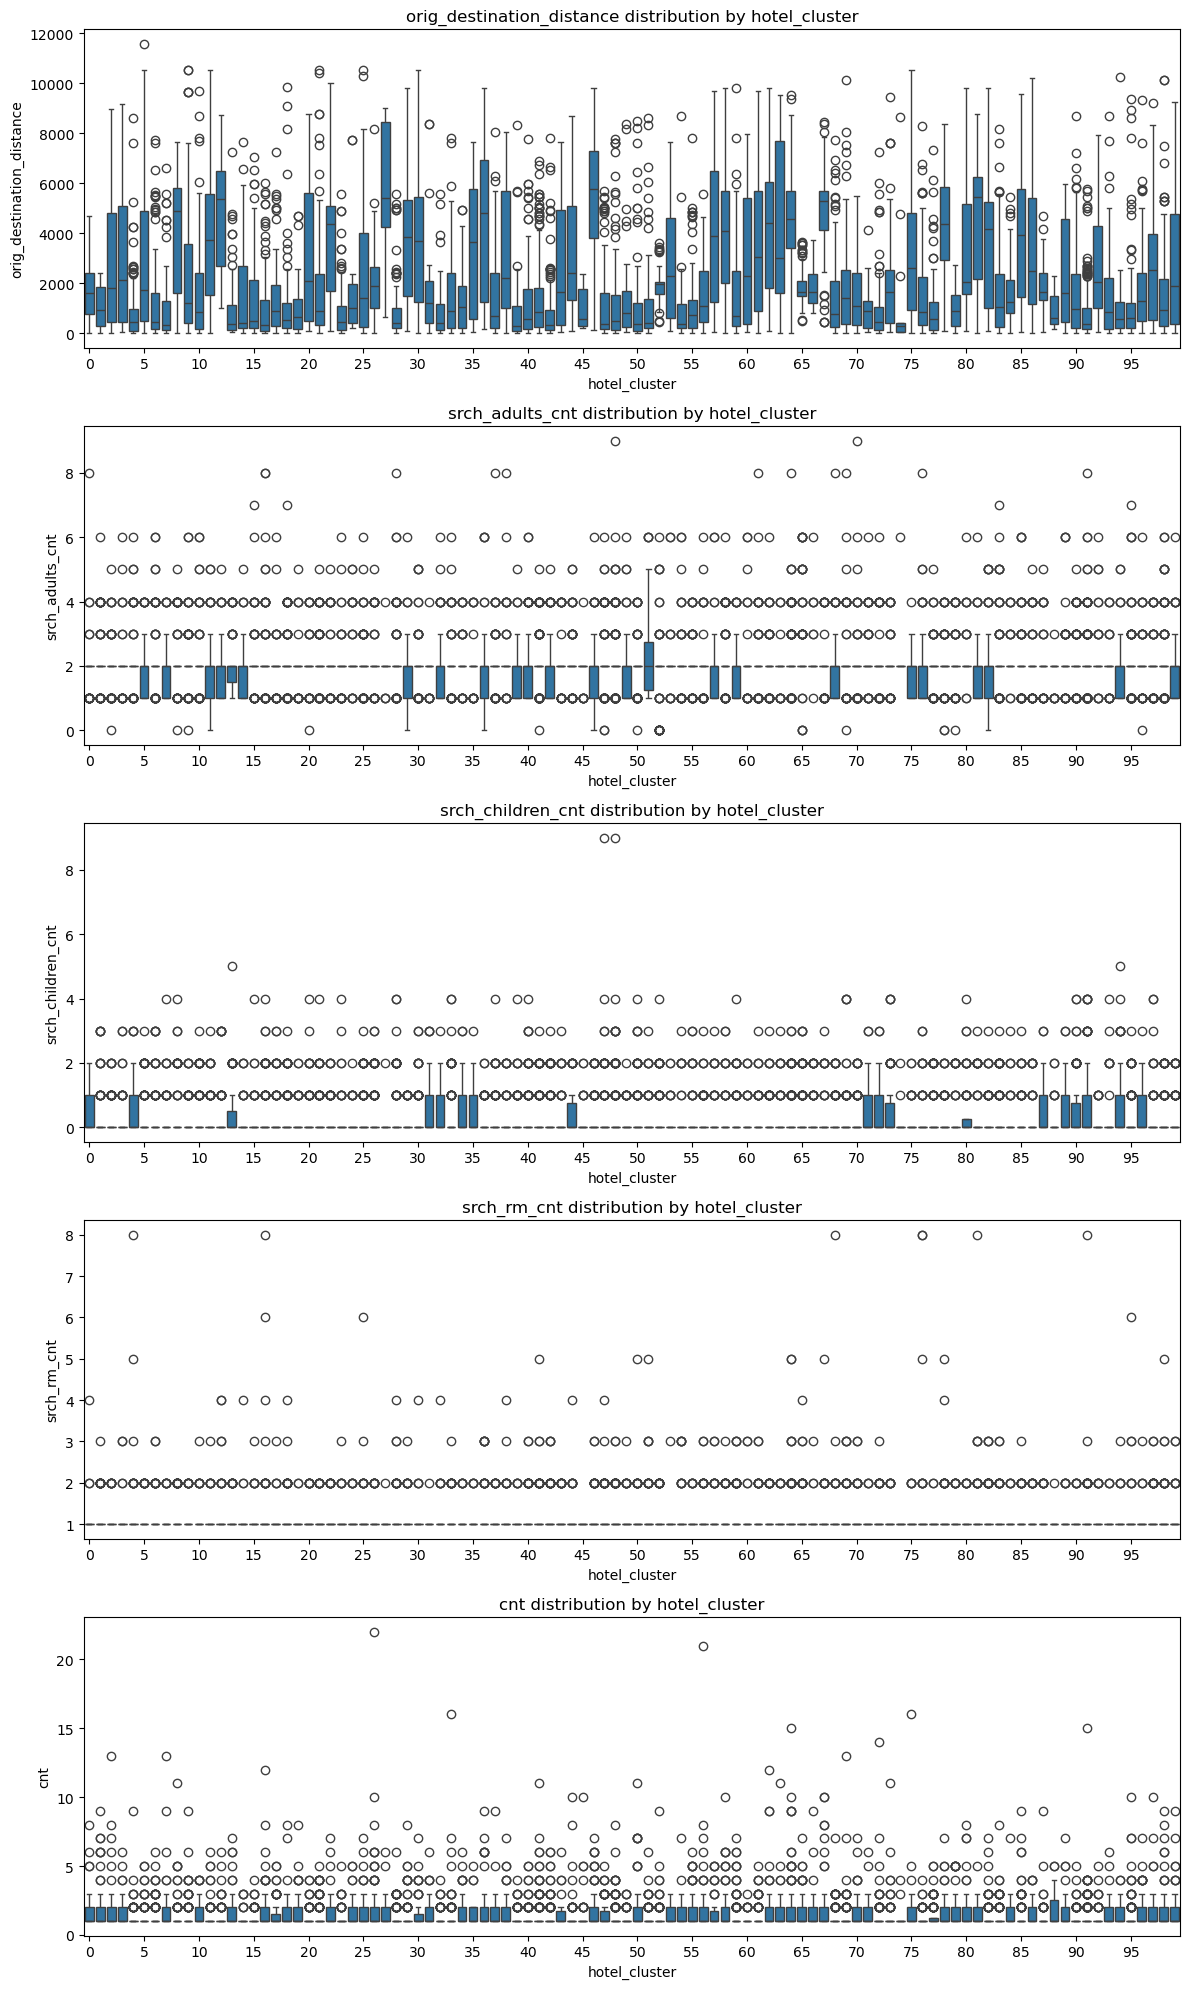

In [22]:
#Non-linear relationships with hotel_cluster

# For numerical features against hotel_cluster
numerical_features = ['orig_destination_distance', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 4*len(numerical_features)))

for i, feature in enumerate(numerical_features):
    # Handle potential NaN values in orig_destination_distance
    if feature == 'orig_destination_distance':
        valid_data = train_df[~train_df[feature].isna()]
    else:
        valid_data = train_df
    
    # For each hotel_cluster, compute the mean value of the feature
    cluster_means = valid_data.groupby('hotel_cluster')[feature].mean().reset_index()
    
    # Sort by hotel_cluster for better visualization
    cluster_means = cluster_means.sort_values('hotel_cluster')
    
    # Plot
    sns.barplot(x='hotel_cluster', y=feature, data=cluster_means, ax=axes[i])
    axes[i].set_title(f'Average {feature} by hotel_cluster')
    
    # If there are too many clusters, limit the displayed ticks
    if len(cluster_means['hotel_cluster'].unique()) > 20:
        axes[i].set_xticks(axes[i].get_xticks()[::5])  # Show every 5th tick

plt.tight_layout()
plt.show()

# Create box plots to see the distribution
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 4*len(numerical_features)))

for i, feature in enumerate(numerical_features):
    if feature == 'orig_destination_distance':
        valid_data = train_df[~train_df[feature].isna()]
    else:
        valid_data = train_df
    
    # Sample data if it's too large
    if len(valid_data) > 10000:
        valid_data = valid_data.sample(10000, random_state=42)
    
    # Plot
    sns.boxplot(x='hotel_cluster', y=feature, data=valid_data, ax=axes[i])
    axes[i].set_title(f'{feature} distribution by hotel_cluster')
    
    # Limit ticks if needed
    if len(valid_data['hotel_cluster'].unique()) > 20:
        axes[i].set_xticks(axes[i].get_xticks()[::5])

plt.tight_layout()
plt.show()


Analyzing site_name:
site_name has 38 unique values. Analyzing top 10 most common values.


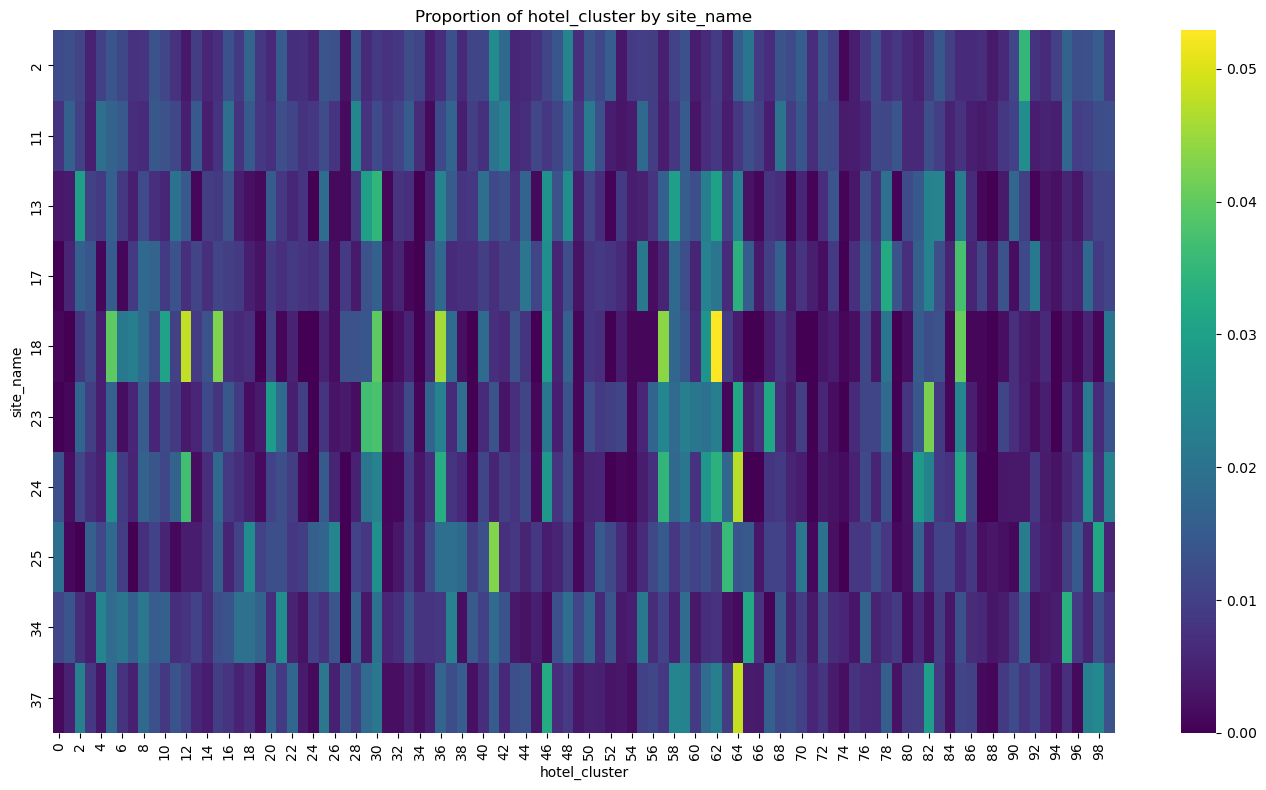

2: [(91, 2384), (41, 1720), (48, 1623)]
11: [(91, 172), (28, 163), (42, 151)]
13: [(30, 78), (62, 68), (2, 67)]
17: [(85, 42), (64, 38), (78, 36)]
18: [(62, 52), (12, 47), (36, 45)]
...

Analyzing posa_continent:


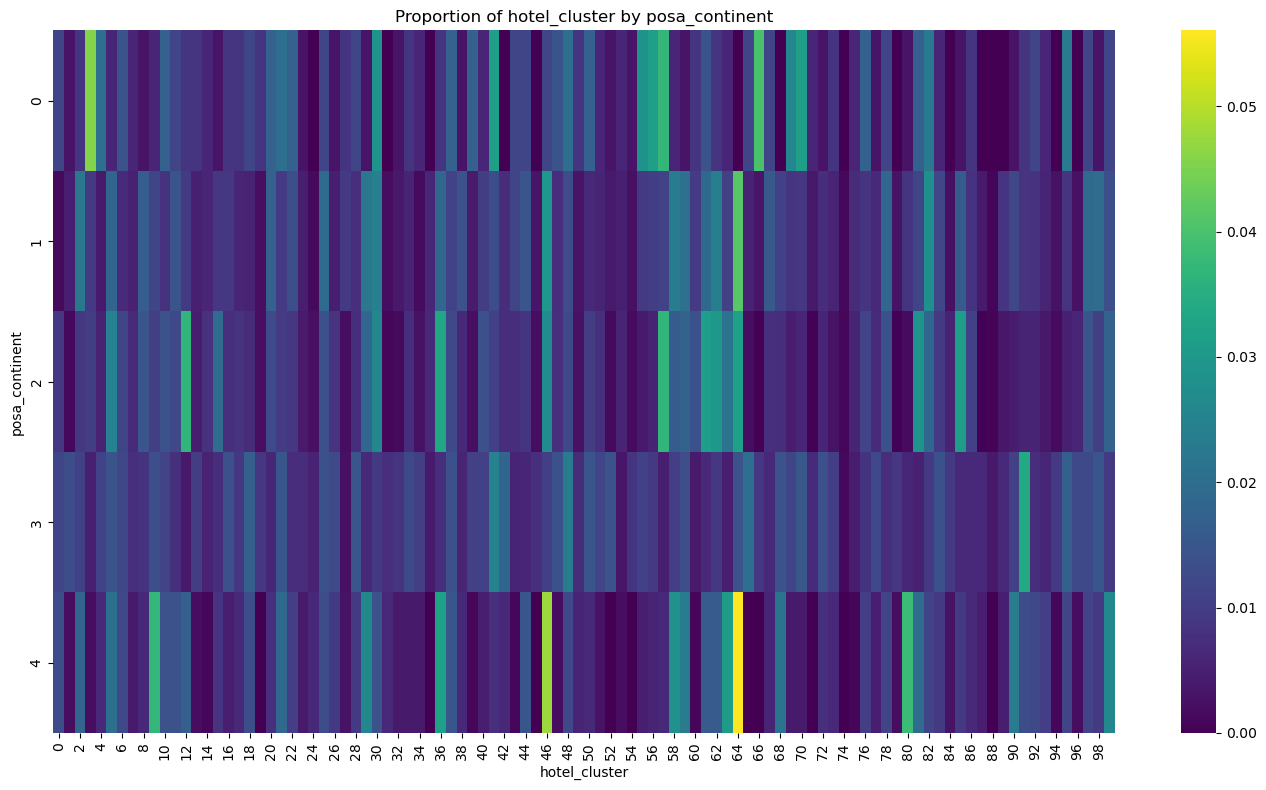

0: [(3, 16), (66, 14), (57, 13)]
1: [(64, 600), (46, 430), (82, 402)]
2: [(57, 264), (12, 263), (36, 240)]
3: [(91, 2598), (41, 1891), (48, 1785)]
4: [(64, 60), (46, 51), (80, 41)]

Analyzing user_location_country:
user_location_country has 123 unique values. Analyzing top 10 most common values.


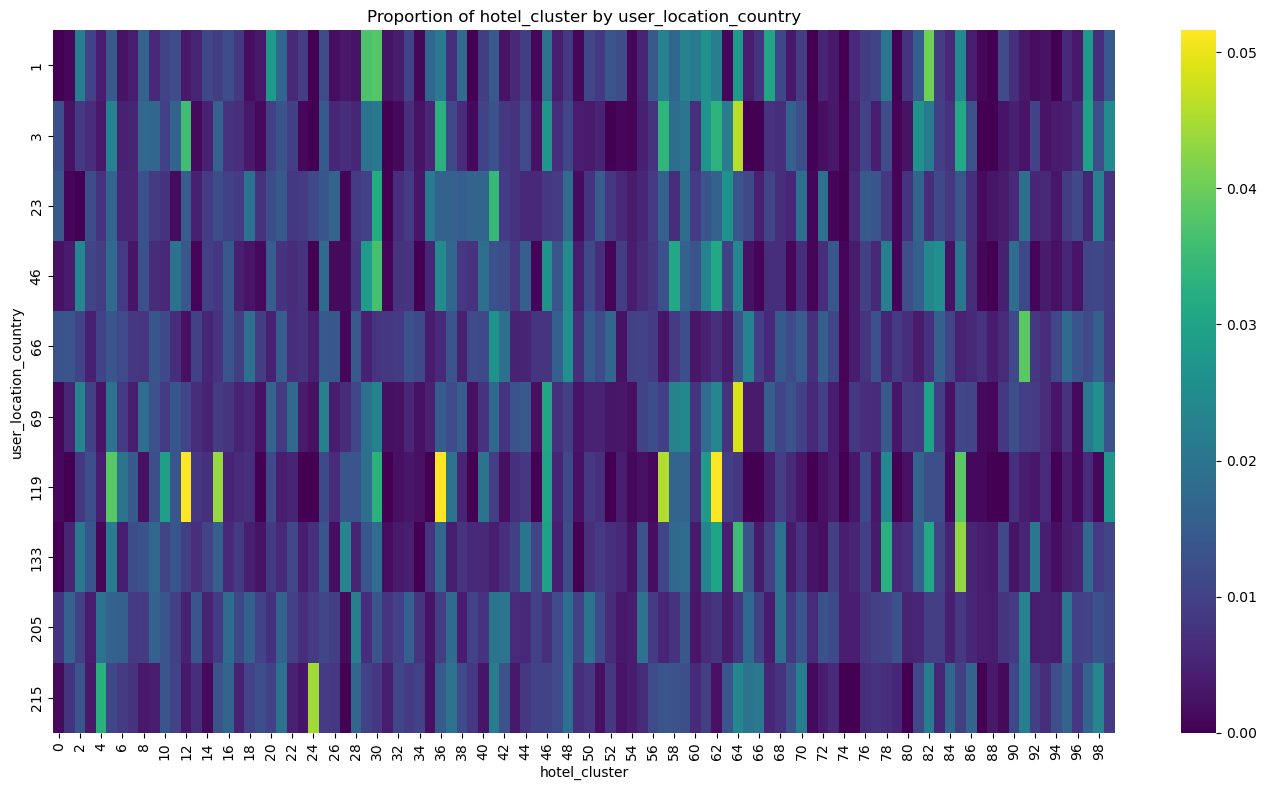

1: [(82, 48), (30, 45), (29, 44)]
3: [(64, 164), (12, 127), (57, 119)]
23: [(41, 46), (30, 42), (63, 35)]
46: [(30, 80), (58, 68), (62, 68)]
66: [(91, 2282), (41, 1546), (48, 1506)]
...

Analyzing user_location_region:
user_location_region has 510 unique values. Analyzing top 10 most common values.


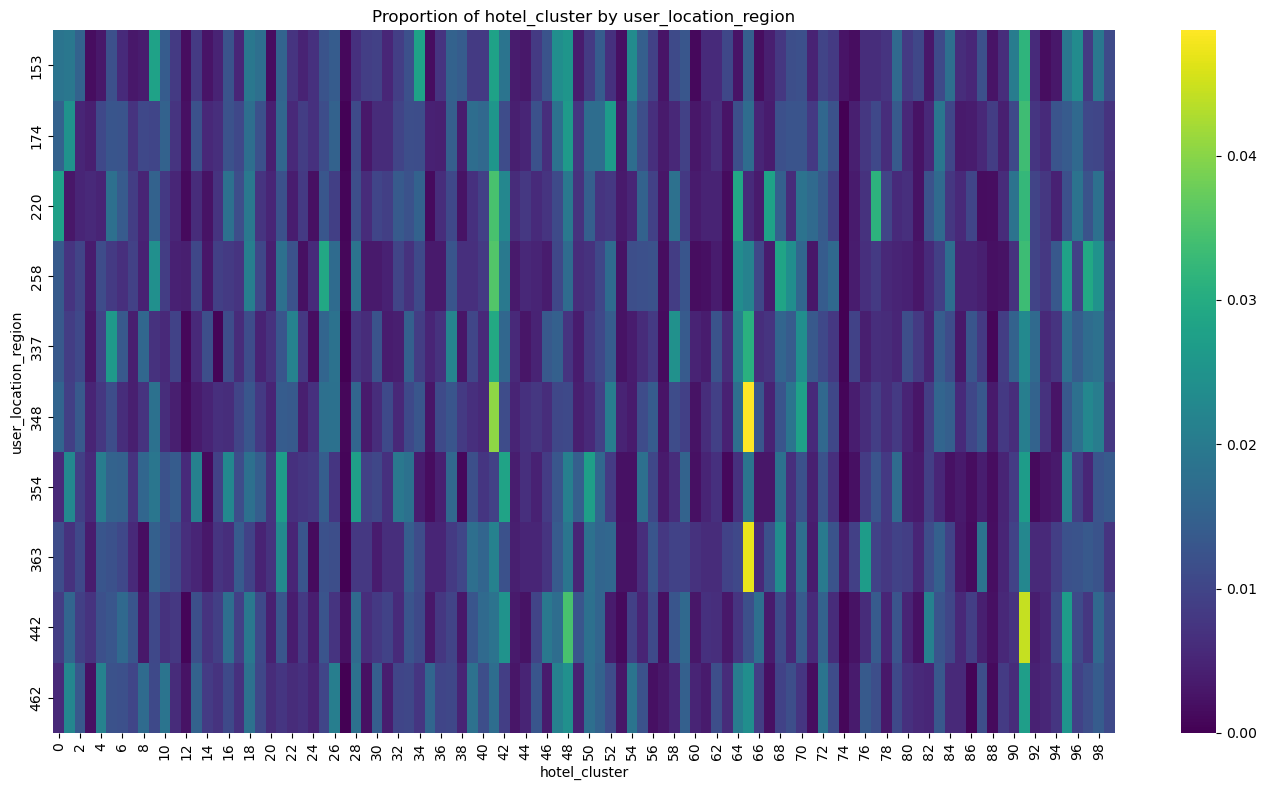

153: [(91, 61), (9, 54), (34, 54)]
174: [(91, 421), (52, 331), (48, 330)]
220: [(41, 149), (91, 140), (77, 135)]
258: [(41, 86), (91, 81), (25, 71)]
337: [(65, 67), (41, 64), (5, 57)]
...

Analyzing user_location_city:
user_location_city has 3751 unique values. Analyzing top 10 most common values.


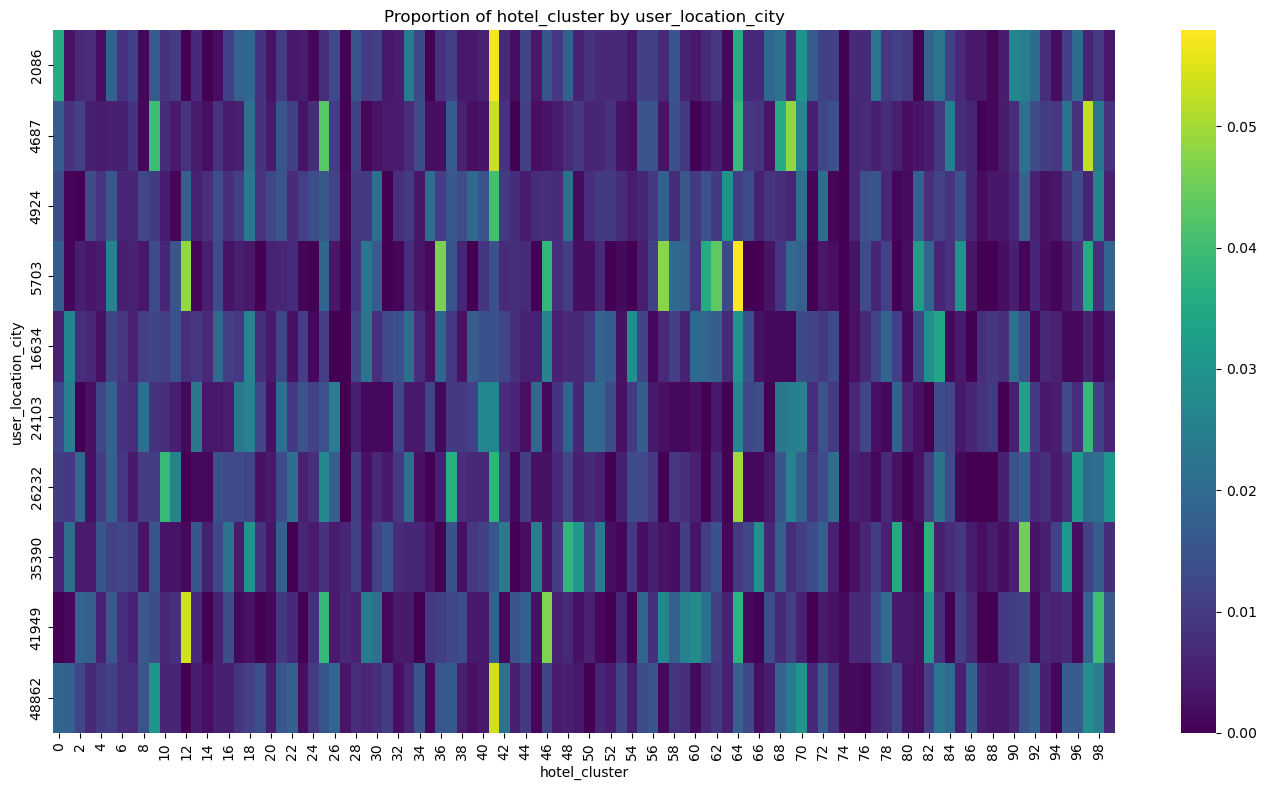

2086: [(41, 63), (0, 39), (64, 39)]
4687: [(41, 52), (97, 51), (69, 47)]
4924: [(41, 46), (63, 33), (98, 30)]
5703: [(64, 85), (12, 71), (57, 70)]
16634: [(83, 26), (64, 23), (54, 22)]
...

Analyzing is_mobile:


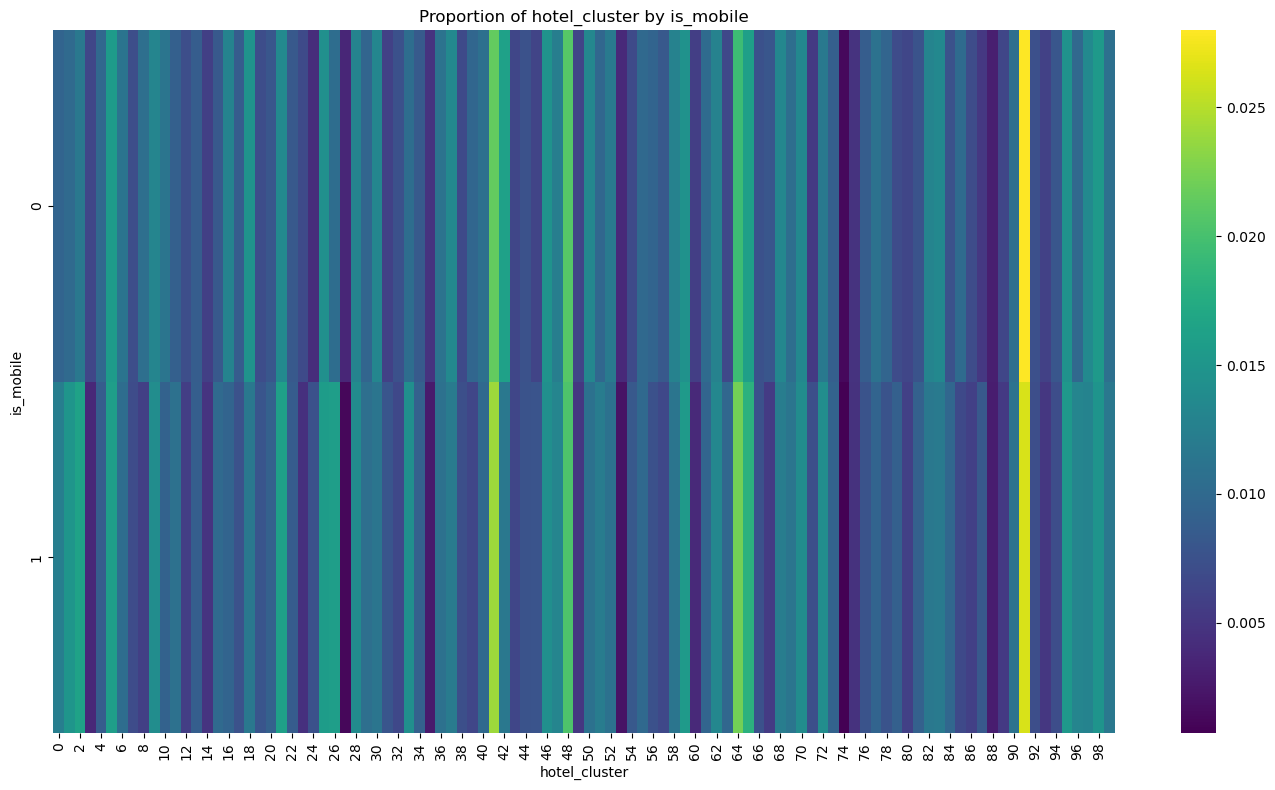

0: [(91, 2413), (41, 1845), (48, 1796)]
1: [(91, 364), (41, 331), (64, 307)]

Analyzing is_package:


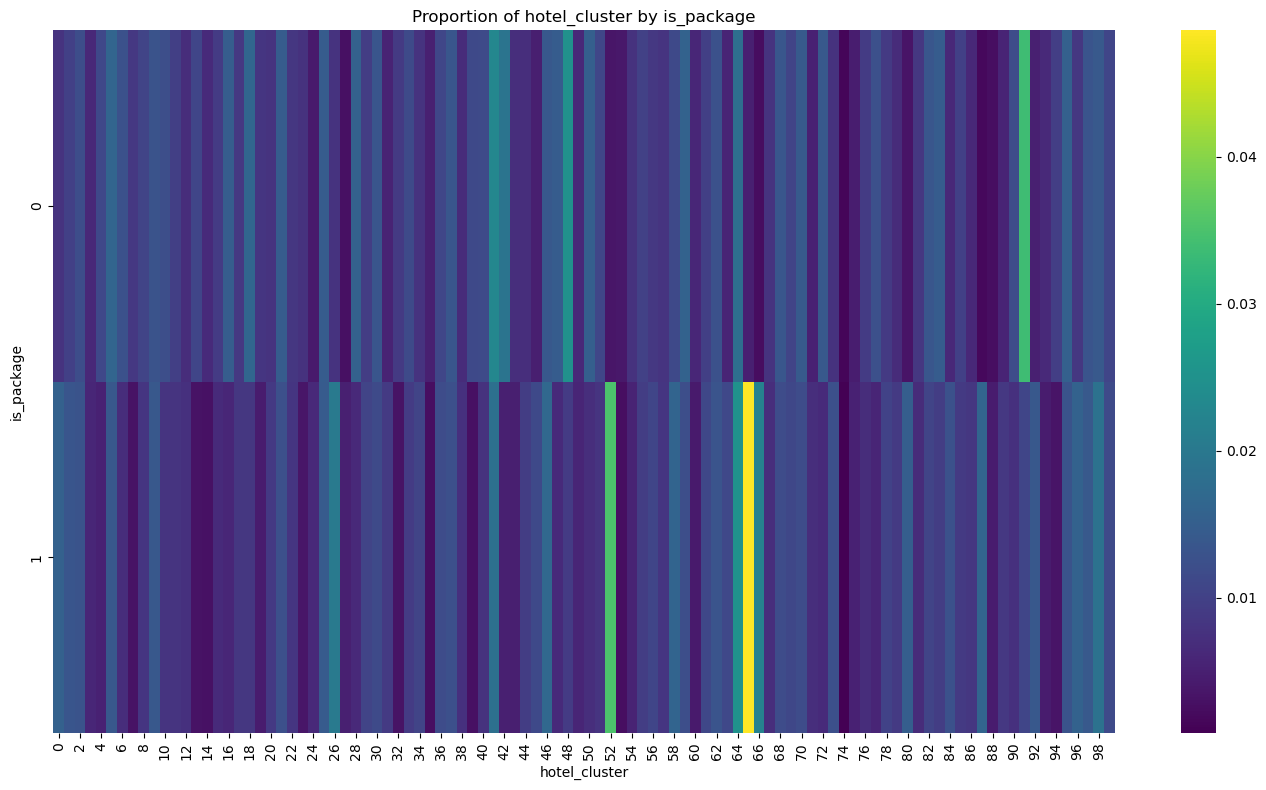

0: [(91, 2500), (48, 1838), (41, 1702)]
1: [(65, 1266), (52, 912), (64, 649)]

Analyzing channel:
channel has 11 unique values. Analyzing top 10 most common values.


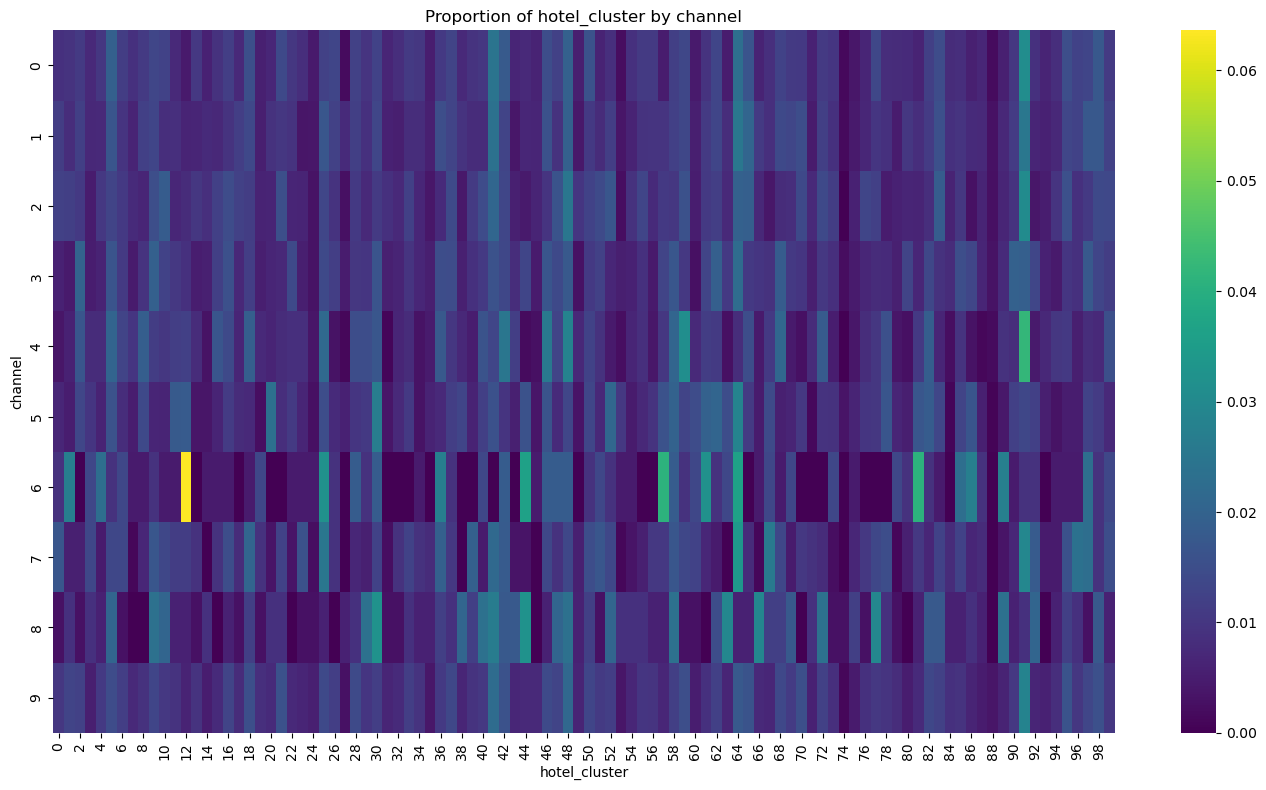

0: [(91, 412), (41, 328), (64, 307)]
1: [(91, 263), (64, 262), (41, 247)]
2: [(91, 263), (48, 215), (41, 179)]
3: [(64, 96), (2, 87), (90, 84)]
4: [(91, 108), (59, 80), (48, 73)]
...

Analyzing srch_destination_id:
srch_destination_id has 5296 unique values. Analyzing top 10 most common values.


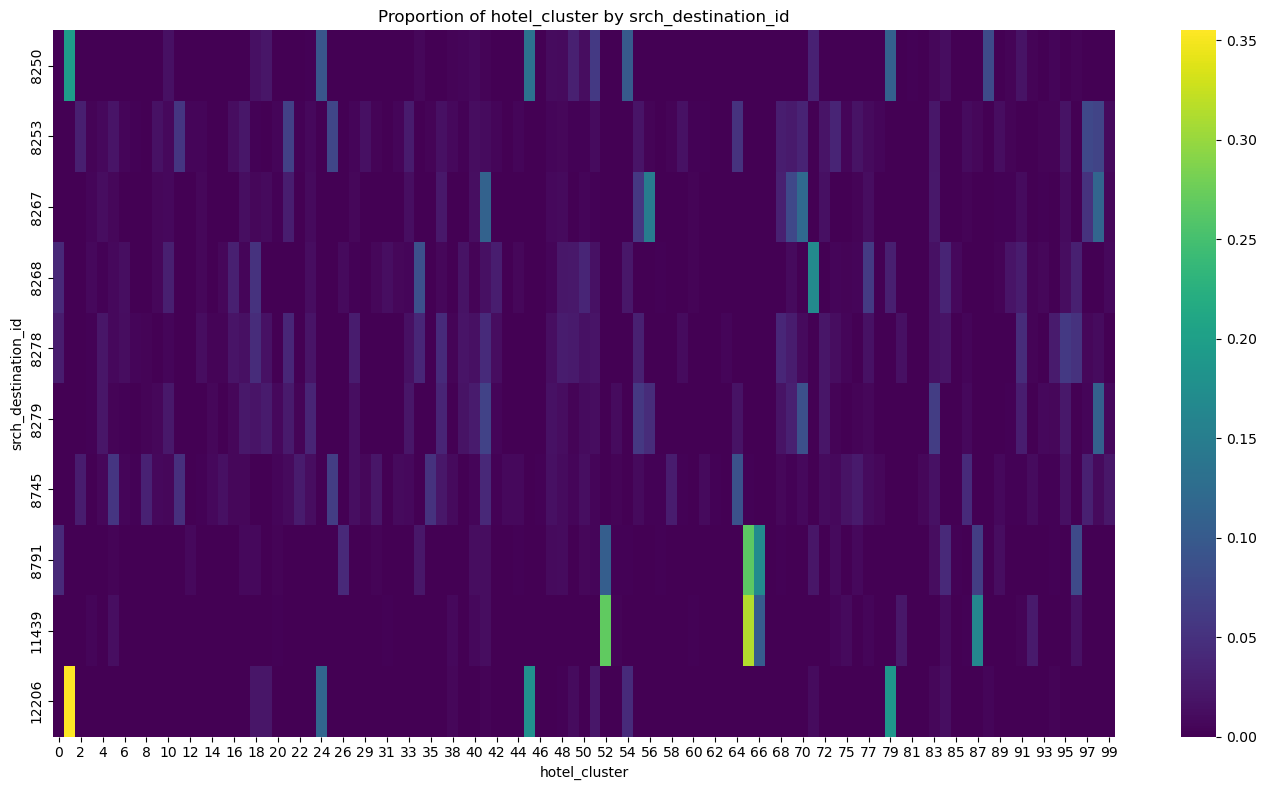

8250: [(1, 670), (45, 455), (79, 376)]
8253: [(97, 103), (25, 100), (98, 95)]
8267: [(56, 364), (70, 298), (98, 282)]
8268: [(71, 264), (34, 136), (77, 95)]
8278: [(95, 55), (96, 47), (18, 41)]
...

Analyzing srch_destination_type_id:


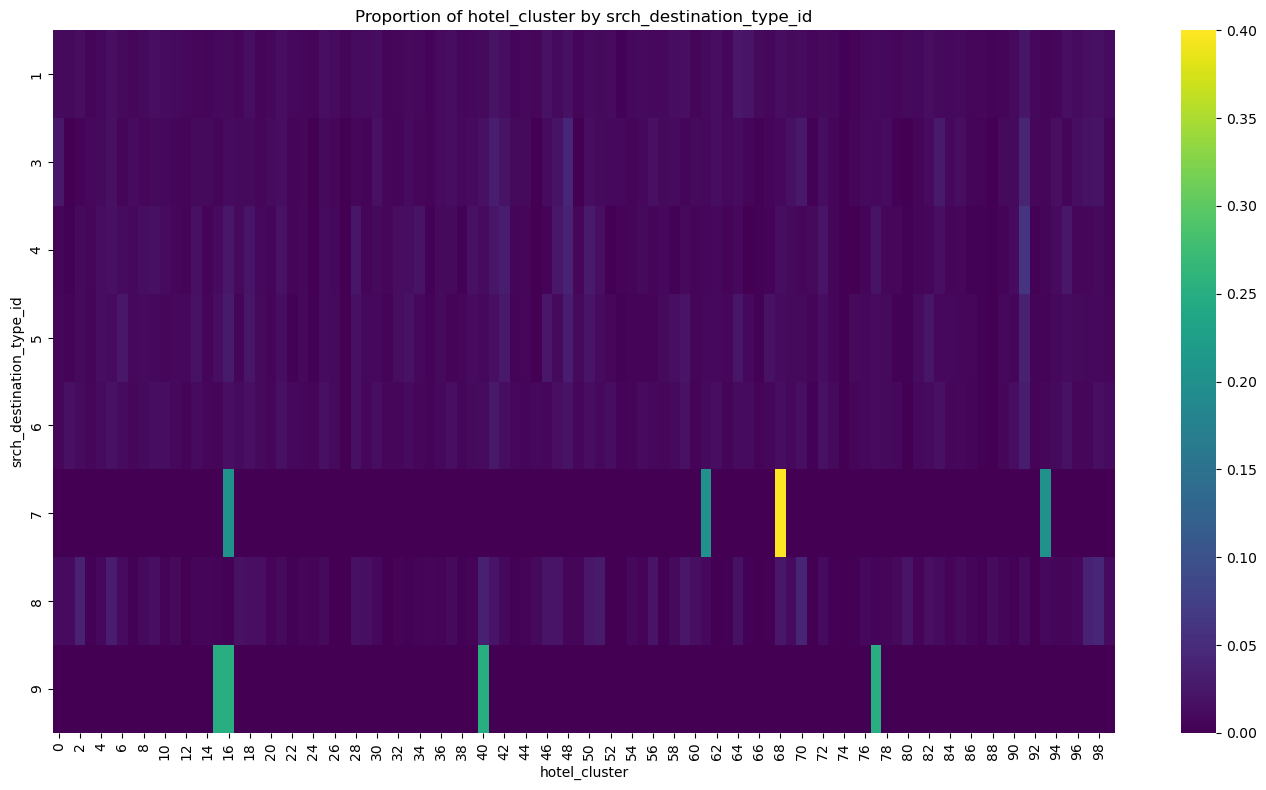

1: [(64, 1489), (91, 1430), (65, 1278)]
3: [(48, 299), (91, 284), (41, 229)]
4: [(91, 201), (48, 124), (42, 106)]
5: [(91, 190), (48, 167), (16, 142)]
6: [(91, 666), (41, 586), (48, 424)]
...

Analyzing hotel_continent:


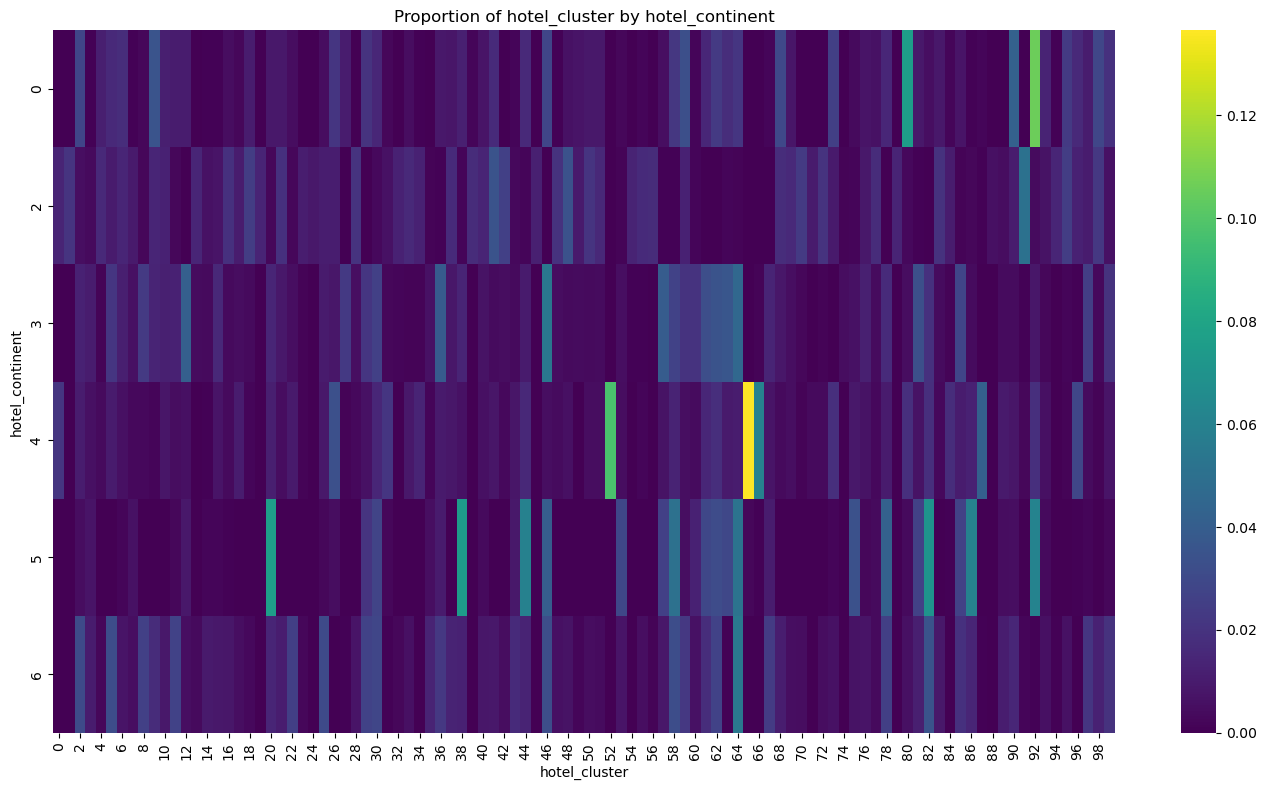

0: [(92, 122), (80, 87), (90, 48)]
2: [(91, 2696), (41, 1838), (48, 1821)]
3: [(46, 652), (64, 549), (12, 488)]
4: [(65, 1626), (52, 1160), (66, 724)]
5: [(20, 86), (38, 84), (82, 80)]
...

Analyzing hotel_country:
hotel_country has 152 unique values. Analyzing top 10 most common values.


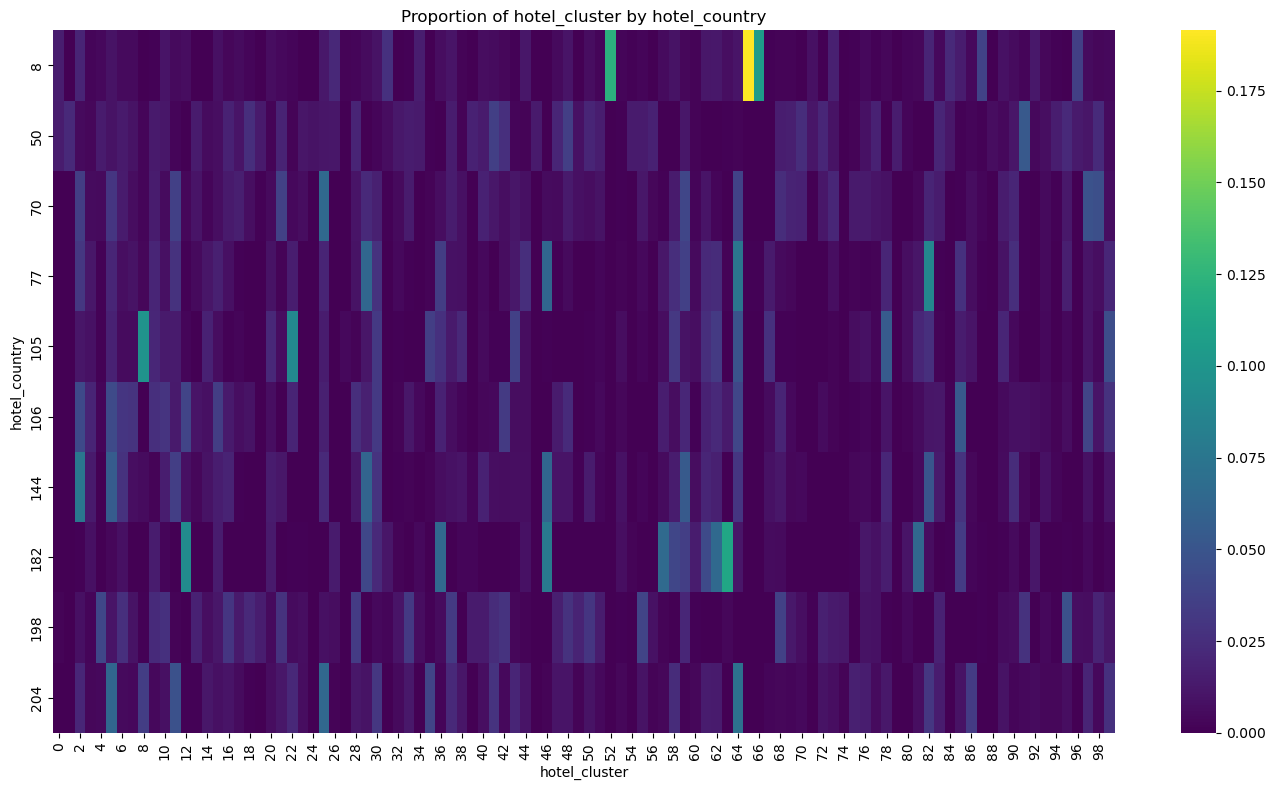

8: [(65, 964), (52, 616), (66, 529)]
50: [(91, 2582), (41, 1738), (48, 1708)]
70: [(25, 216), (97, 161), (98, 154)]
77: [(82, 205), (64, 173), (29, 147)]
105: [(8, 371), (22, 338), (78, 204)]
...

Analyzing hotel_market:
hotel_market has 1531 unique values. Analyzing top 10 most common values.


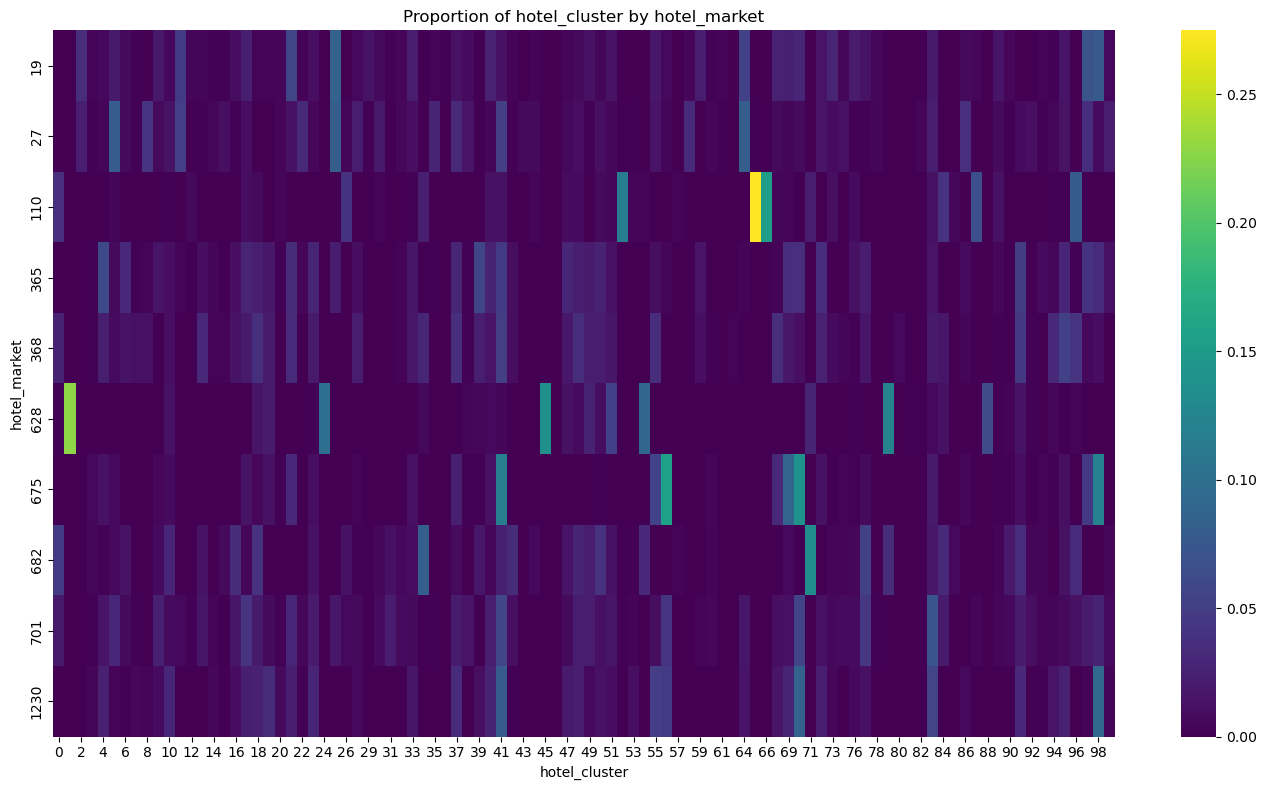

19: [(25, 172), (98, 154), (97, 143)]
27: [(25, 122), (64, 121), (5, 119)]
110: [(65, 501), (66, 276), (52, 210)]
365: [(4, 116), (39, 109), (91, 94)]
368: [(95, 83), (41, 80), (91, 71)]
...


In [23]:
# For categorical features from your dataset
categorical_features = ['site_name', 'posa_continent', 'user_location_country', 
                        'user_location_region', 'user_location_city', 'is_mobile', 
                        'is_package', 'channel', 'srch_destination_id', 
                        'srch_destination_type_id', 'hotel_continent', 
                        'hotel_country', 'hotel_market']

# Function to analyze categorical distribution
def analyze_categorical_distribution(feature, max_categories=10):
    # Check if feature has too many unique values
    unique_values = train_df[feature].nunique()
    
    if unique_values > max_categories:
        print(f"{feature} has {unique_values} unique values. Analyzing top {max_categories} most common values.")
        top_values = train_df[feature].value_counts().nlargest(max_categories).index
        filtered_df = train_df[train_df[feature].isin(top_values)]
    else:
        filtered_df = train_df
    
    # Get counts for each combination
    cross_tab = pd.crosstab(filtered_df[feature], filtered_df['hotel_cluster'])
    
    # Convert to proportions
    prop_table = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    
    # Plot heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(prop_table, cmap='viridis')
    plt.title(f'Proportion of hotel_cluster by {feature}')
    plt.ylabel(feature)
    plt.xlabel('hotel_cluster')
    plt.tight_layout()
    plt.show()
    
    # Return top 3 hotel clusters for each category
    top_clusters = {}
    for cat in cross_tab.index:
        top_3 = cross_tab.loc[cat].nlargest(3)
        top_clusters[cat] = list(zip(top_3.index, top_3.values))
    
    return top_clusters

# Run for each categorical feature with reasonable number of categories
for feature in categorical_features:
    print(f"\nAnalyzing {feature}:")
    try:
        top_clusters = analyze_categorical_distribution(feature)
        
        # Print top 3 hotel clusters for each category (limited to 5 categories for readability)
        for i, (cat, clusters) in enumerate(top_clusters.items()):
            if i < 5:  # Show only first 5 categories
                print(f"{cat}: {clusters}")
            else:
                if i == 5:
                    print("...")
                break
    except Exception as e:
        print(f"Error analyzing {feature}: {e}")

In [24]:
# Function to perform chi-square test
def chi_square_test(feature, target='hotel_cluster', max_categories=30):
    # Check if feature has too many unique values
    if train_df[feature].nunique() > max_categories:
        print(f"{feature} has too many unique values for chi-square test. Sampling top {max_categories}.")
        top_values = train_df[feature].value_counts().nlargest(max_categories).index
        filtered_df = train_df[train_df[feature].isin(top_values)]
    else:
        filtered_df = train_df
    
    # Sample if dataset is too large
    if len(filtered_df) > 50000:
        filtered_df = filtered_df.sample(50000, random_state=42)
    
    contingency_table = pd.crosstab(filtered_df[feature], filtered_df[target])
    
    # Run chi-square test
    try:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        print(f"Chi-square test for {feature} vs {target}:")
        print(f"Chi-square value: {chi2:.2f}")
        print(f"p-value: {p:.10f}")
        print(f"Degrees of freedom: {dof}")
        print("Is relationship significant at 0.05 level?", "Yes" if p < 0.05 else "No")
        print("-" * 50)
        
        return chi2, p, dof
    except Exception as e:
        print(f"Error in chi-square test for {feature}: {e}")
        return None, None, None

# Run chi-square tests for all categorical features
chi_square_results = {}
for feature in categorical_features:
    result = chi_square_test(feature)
    if result[0] is not None:
        chi_square_results[feature] = {'chi2': result[0], 'p_value': result[1], 'dof': result[2]}

# Sort features by chi-square value to identify strongest relationships
if chi_square_results:
    sorted_features = sorted(chi_square_results.items(), key=lambda x: x[1]['chi2'], reverse=True)
    print("\nCategorical features ranked by strength of relationship with hotel_cluster:")
    for feature, stats in sorted_features:
        print(f"{feature}: Chi2 = {stats['chi2']:.2f}, p = {stats['p_value']:.10f}")

site_name has too many unique values for chi-square test. Sampling top 30.
Chi-square test for site_name vs hotel_cluster:
Chi-square value: 14611.18
p-value: 0.0000000000
Degrees of freedom: 2871
Is relationship significant at 0.05 level? Yes
--------------------------------------------------
Chi-square test for posa_continent vs hotel_cluster:
Chi-square value: 7562.77
p-value: 0.0000000000
Degrees of freedom: 396
Is relationship significant at 0.05 level? Yes
--------------------------------------------------
user_location_country has too many unique values for chi-square test. Sampling top 30.
Chi-square test for user_location_country vs hotel_cluster:
Chi-square value: 21073.73
p-value: 0.0000000000
Degrees of freedom: 2871
Is relationship significant at 0.05 level? Yes
--------------------------------------------------
user_location_region has too many unique values for chi-square test. Sampling top 30.
Chi-square test for user_location_region vs hotel_cluster:
Chi-square value: 

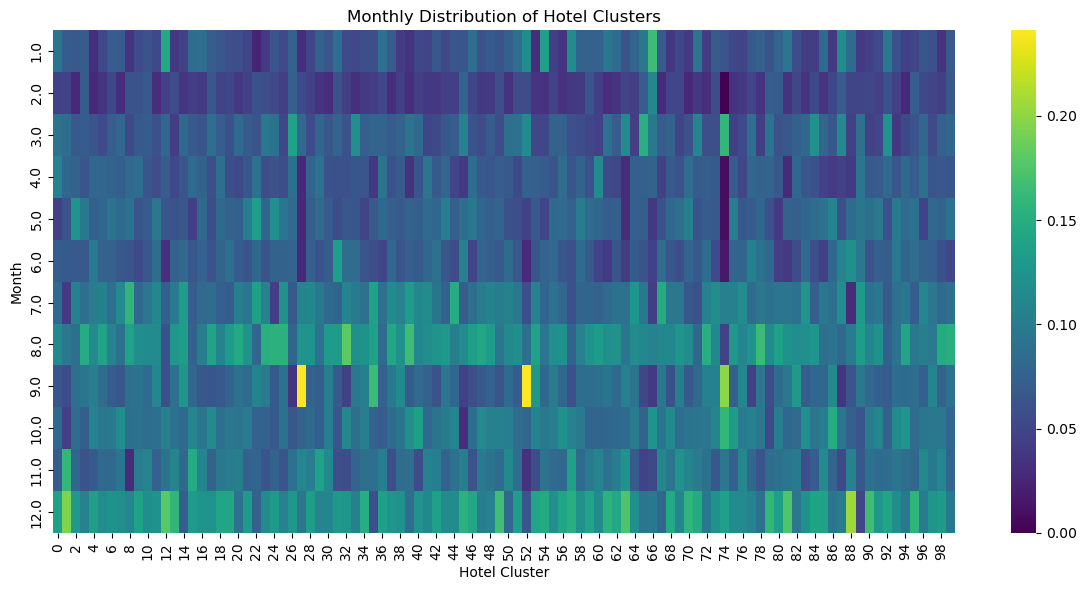

In [28]:
# Convert date strings to datetime objects
train_df['srch_ci'] = pd.to_datetime(train_df['srch_ci'], errors='coerce')
train_df['srch_co'] = pd.to_datetime(train_df['srch_co'], errors='coerce')

# Create derived features
train_df['trip_duration'] = (train_df['srch_co'] - train_df['srch_ci']).dt.days
train_df['search_month'] = train_df['srch_ci'].dt.month
train_df['search_day_of_week'] = train_df['srch_ci'].dt.dayofweek
train_df['is_weekend'] = train_df['search_day_of_week'].isin([5, 6]).astype(int)

# Analyze monthly patterns
plt.figure(figsize=(12, 6))
monthly_bookings = pd.crosstab(train_df['search_month'], train_df['hotel_cluster'])
monthly_props = monthly_bookings.div(monthly_bookings.sum(axis=0), axis=1)
sns.heatmap(monthly_props, cmap='viridis')
plt.title('Monthly Distribution of Hotel Clusters')
plt.xlabel('Hotel Cluster')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

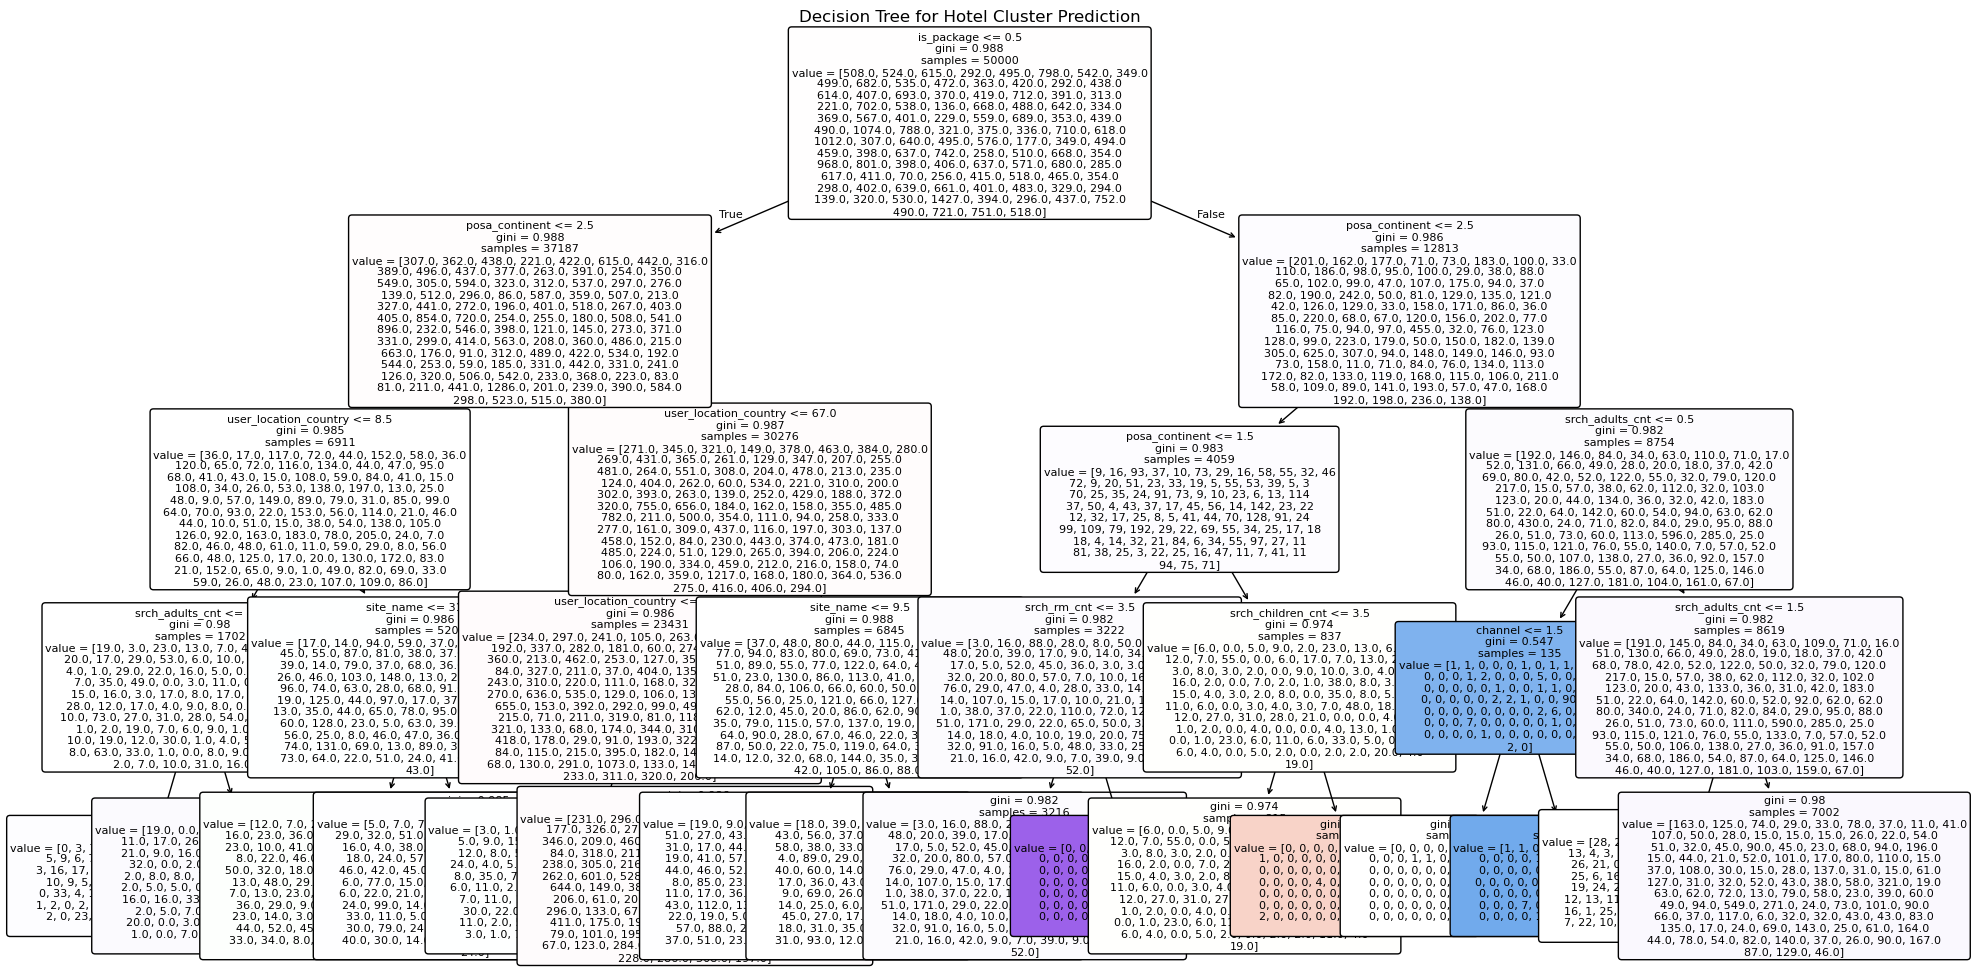

Feature importance from decision tree:
                 Feature  Importance
1         posa_continent    0.325618
6        srch_adults_cnt    0.250569
4             is_package    0.220134
2  user_location_country    0.099341
0              site_name    0.048877
5                channel    0.023610
7      srch_children_cnt    0.016765
8            srch_rm_cnt    0.015086
3              is_mobile    0.000000
9                    cnt    0.000000


In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Select relevant features
features = ['site_name', 'posa_continent', 'user_location_country', 
           'is_mobile', 'is_package', 'channel', 
           'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt']

# Prepare data for decision tree
X = train_df[features].copy()
y = train_df['hotel_cluster']

# Handle missing values
X = X.fillna(-1)  # Replace NaN with -1

# Encode categorical features
for feature in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))

# Sample if data is too large
if len(X) > 50000:
    X, _, y, _ = train_test_split(X, y, train_size=50000, random_state=42)

# Train a simple decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X, y)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for Hotel Cluster Prediction")
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature importance from decision tree:")
print(feature_importance)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select features based on our analysis
selected_features = [
    'posa_continent',       # Top predictor from decision tree
    'srch_adults_cnt',      # Second most important feature
    'is_package',           # Third most important feature
    'user_location_country',# Fourth most important feature
    'site_name',            # Fifth most important feature
    'channel',              # Moderate importance
    'srch_rm_cnt',          # Shows some relationship
    'trip_duration',        # Engineered feature from time analysis
    'search_month',         # Seasonal patterns observed
    'is_weekend'            # Potentially useful time feature
]

# Split data
X = train_df[selected_features].copy()
y = train_df['hotel_cluster']

# Handle missing values
X = X.fillna(-1)  # Replace NaN with -1 as a simple strategy

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create pipeline with logistic regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', 
                                     solver='lbfgs', 
                                     max_iter=1000, 
                                     random_state=42))
])

# Fit the model - this may take some time with a large dataset
log_reg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_pipeline.predict(X_val)

# Evaluate
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

C:\Users\Olidia Lunga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.0449

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       174
           1       0.00      0.00      0.00       205
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00       180
           5       0.00      0.00      0.00       320
           6       0.00      0.00      0.00       230
           7       0.00      0.00      0.00       139
           8       0.00      0.00      0.00       216
           9       0.00      0.00      0.00       256
          10       0.00      0.00      0.00       226
          11       0.00      0.00      0.00       164
          12       0.00      0.00      0.00       136
          13       0.00      0.00      0.00       181
          14       0.00      0.00      0.00       105
          15       0.00      0.00      0.00       159
          16       0.00      0.00      0

C:\Users\Olidia Lunga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olidia Lunga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Olidia Lunga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
